# Inadimplência de clientes de cartão de crédito

Base de dados pode ser encontrada em: https://www.kaggle.com/datasets/gabrieloliveirasan/inadimplncia-de-clientes-de-carto-de-crdito?resource=download

### Descrição dos dados

**Variáveis preditivas ou explicativas:** Limite de crédito, Sexo (1 = masculino; 2 = feminino), Escolaridade (1 = pós-graduação; 2 = graduação; 3 = ensino médio; 4 = outros), Estado Civil (1 = casado; 2 = solteiro; 3 = outros), Idade, Status de pagamento (Setembro, Agosto, Julho, Junho, Maio, Abril), Valor da fatura (Setembro, Agosto, Julho, Junho, Maio, Abril), Valor do pagamento (Setembro, Agosto, Julho, Junho, Maio, Abril).

Status de pagamento, Valor da fatura e Valor do pagamento, correspondem cada uma com 6 variáveis, sendo que, a variável, Status de Pagamento, recebe os seguintes valores (-1 = Pago devidamente; 0 = Pago Atraso e/ou Negociação; 1 = Atraso no pagamento por 1 Mês; 2 = Atraso no pagamento por 2 Mês; ...; 9 = Atraso no pagamento por 9 Mês ou Mais)

Mais detalhes sobre a pesquisa podem ser encontrados em 
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

A variável resposta foi empregada como sendo, *pagamento inadimplente (Sim = 1, Não = 0)*. Aqui, vamos usar esta variável da seguinte forma.

**Variável resposta ou predita:**  Status Pagamento (1 = Inadimplente, 0 = Adimplente)

A base de dados é de cliente de cartão de crédito com oreigem em Taiwan onde a moeda vigente é o Novo dólar taiwanês (NT\$).

## Pré-processamento de dados e análise descritiva

Nesta etapa, é realizados o tratamento dos dados e obtido algumas medidas descritivas que auxiliam no entendimento dos dados, algumas etapas de tratamentos são mostradas diretamente para tornar menos cansativa a leitura.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('credit.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Renomeando as variáveis 

Esse processo facilitará o entendimento e a visualização dos dados posteriormente.

In [3]:
df.rename(columns={'ID': 'ID Cliente', 'LIMIT_BAL': 'Limite_Credito','SEX':'Sexo', 'EDUCATION': 'Escolaridade', 
                  'MARRIAGE':'Est_Civil', 'AGE':'Idade', 'PAY_0':'Status_Pag_Set', 'PAY_2':'Status_Pag_Ago', 
                   'PAY_3':'Status_Pag_Jul', 'PAY_4':'Status_Pag_Jun', 'PAY_5':'Status_Pag_Mai', 'PAY_6':'Status_Pag_Abr', 
                   'BILL_AMT1':'Valor_Fat_Set', 'BILL_AMT2':'Valor_Fat_Ago', 'BILL_AMT3':'Valor_Fat_Jul', 
                   'BILL_AMT4':'Valor_Fat_Jun', 'BILL_AMT5':'Valor_Fat_Mai', 'BILL_AMT6':'Valor_Fat_Abr', 
                   'PAY_AMT1':'Pag_Fat_Set', 'PAY_AMT2':'Pag_Fat_Ago', 'PAY_AMT3':'Pag_Fat_Jul', 
                   'PAY_AMT4':'Pag_Fat_Jun', 'PAY_AMT5':'Pag_Fat_Mai', 'PAY_AMT6':'Pag_Fat_Abr', 
                   'default payment next month': 'Status Pagamento'}, inplace = True)


In [4]:
df.describe()

,ID Cliente,Limite_Credito,Sexo,Escolaridade,Est_Civil,Idade,Status_Pag_Set,Status_Pag_Ago,Status_Pag_Jul,Status_Pag_Jun,...,Valor_Fat_Jun,Valor_Fat_Mai,Valor_Fat_Abr,Pag_Fat_Set,Pag_Fat_Ago,Pag_Fat_Jul,Pag_Fat_Jun,Pag_Fat_Mai,Pag_Fat_Abr,Status Pagamento
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Observa-se valores negativos em *min* da função *describe* para as variáveis que refere-se ao valor da fatura, uma análise mais detalhada permitiu perceber que esses valores negativos são comuns da base dados de crédito. Observe também que, pela contagem dos dados não existe nenhuma observação faltante, mas, mesmo assim, pode-se executar o código seguinte. 

In [5]:
df.isnull().sum()

ID Cliente          0
Limite_Credito      0
Sexo                0
Escolaridade        0
Est_Civil           0
Idade               0
Status_Pag_Set      0
Status_Pag_Ago      0
Status_Pag_Jul      0
Status_Pag_Jun      0
Status_Pag_Mai      0
Status_Pag_Abr      0
Valor_Fat_Set       0
Valor_Fat_Ago       0
Valor_Fat_Jul       0
Valor_Fat_Jun       0
Valor_Fat_Mai       0
Valor_Fat_Abr       0
Pag_Fat_Set         0
Pag_Fat_Ago         0
Pag_Fat_Jul         0
Pag_Fat_Jun         0
Pag_Fat_Mai         0
Pag_Fat_Abr         0
Status Pagamento    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ID Cliente        30000 non-null  int64
 1   Limite_Credito    30000 non-null  int64
 2   Sexo              30000 non-null  int64
 3   Escolaridade      30000 non-null  int64
 4   Est_Civil         30000 non-null  int64
 5   Idade             30000 non-null  int64
 6   Status_Pag_Set    30000 non-null  int64
 7   Status_Pag_Ago    30000 non-null  int64
 8   Status_Pag_Jul    30000 non-null  int64
 9   Status_Pag_Jun    30000 non-null  int64
 10  Status_Pag_Mai    30000 non-null  int64
 11  Status_Pag_Abr    30000 non-null  int64
 12  Valor_Fat_Set     30000 non-null  int64
 13  Valor_Fat_Ago     30000 non-null  int64
 14  Valor_Fat_Jul     30000 non-null  int64
 15  Valor_Fat_Jun     30000 non-null  int64
 16  Valor_Fat_Mai     30000 non-null  int64
 17  Valor_Fat_Abr     30000 non-nul

Todas as variáveis foram identificadas como valores inteiros.

### Tratando inconsistências

In [7]:
df[['Est_Civil']].value_counts() # 1 = casado; 2 = solteiro; 3 = outros

Est_Civil
2            15964
1            13659
3              323
0               54
dtype: int64

In [8]:
df[['Escolaridade']].value_counts() #1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros

Escolaridade
2               14030
1               10585
3                4917
5                 280
4                 123
6                  51
0                  14
dtype: int64

In [9]:
df[['Status_Pag_Ago']].value_counts()

Status_Pag_Ago
 0                15730
-1                 6050
 2                 3927
-2                 3782
 3                  326
 4                   99
 1                   28
 5                   25
 7                   20
 6                   12
 8                    1
dtype: int64

Algumas inconsistências foram encontradas e optou-se pelo seguinte:

- Estado civil: valores diferentes de 1,2 ou 3, foi considerado como pertencentes a classe *outros*
- Escolaridade: valores diferentes de 1,2,3 ou 4, foi considerado como pertencentes a classe *outros*

Poderia ter optado por remover as variáveis, porém observações classificadas como *outros* em estado civil, podem tanto ser divorciados ou viuvos, por exemplo, como isso não foi bem definido, optei por realizar a tratativa desta maneira, de modo que que *outros* segue como sendo aqueles em que a classe não foi especificamente definida, o mesmo vale para *escolaridade*.

In [10]:
df.loc[df['Est_Civil']==0, 'Est_Civil']=3

df.loc[df['Escolaridade']>4, 'Escolaridade']=4
df.loc[df['Escolaridade']==0, 'Escolaridade']=4

In [11]:
del df['ID Cliente']

### Avaliando o comportamento dos dados usando boxplot

<AxesSubplot:>

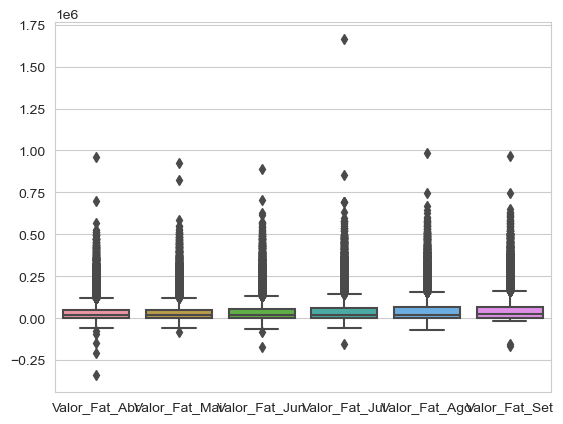

In [56]:
#%%hidden
sns.set_style("whitegrid")
sns.boxplot(data=df[["Valor_Fat_Abr","Valor_Fat_Mai","Valor_Fat_Jun",
                     "Valor_Fat_Jul","Valor_Fat_Ago","Valor_Fat_Set"]], orient='v')

<AxesSubplot:>

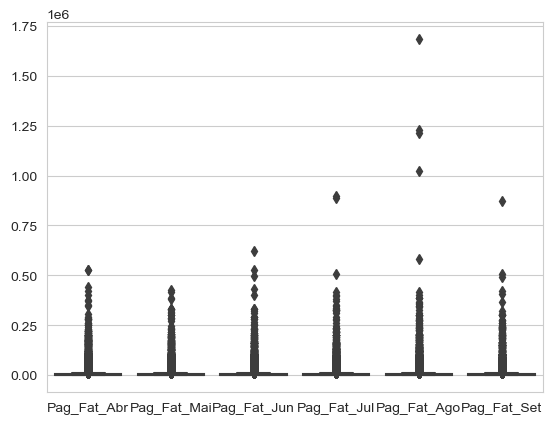

In [13]:
sns.set_style("whitegrid")
sns.boxplot(data=df[["Pag_Fat_Abr","Pag_Fat_Mai","Pag_Fat_Jun",
                     "Pag_Fat_Jul","Pag_Fat_Ago","Pag_Fat_Set"]], orient='v')

<AxesSubplot:>

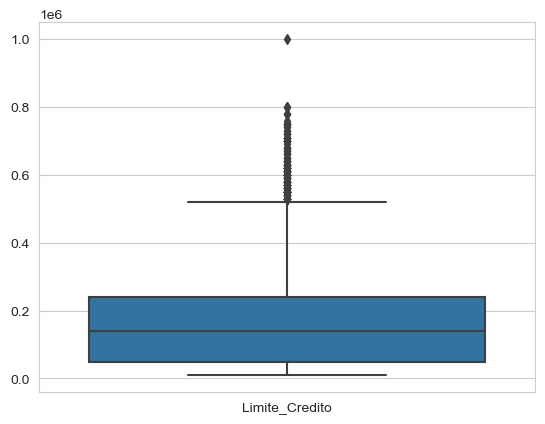

In [14]:
sns.set_style("whitegrid")
sns.boxplot(data=df[["Limite_Credito"]], orient='v')

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(data=df[["Idade"]], orient='v')

Optei por não remover os pontos que talvez possam ser identificados como outliers, pois, não é possivel determinar se esses dados foram apenas preenchidos incorretamente ou se existem. Se avaliarmos bem, eles podem ser considerados, em alguns casos, pouco comuns, mas não quer dizer que não existam. Para o caso de uma modelagem posterior, podemos avaliar a inlfuência dessas observações em um modelo de previsão.

## Análise exploratória

Essa análise inicial consiste em buscar compreender o comportamento dos dados e buscar relações, através de algumas visualizações gráficas. 

### Variáveis categóricas

Para facilitar a visualização gráfica dos dados, irei renomear as categorias das variáveis categóricas que já estão definidas. 

In [15]:
df['Status Pagamento'] = df['Status Pagamento'].replace({1: 'Inadimplente', 0: 'Adimplente'})
df['Sexo'] = df['Sexo'].replace({1: 'Masculino', 2: 'Feminino'})
df['Escolaridade'] = df['Escolaridade'].replace({1: 'Pós-graduação', 2: 'Graduação', 3: 'Ensino médio', 4: 'Outros'})
df['Est_Civil'] = df['Est_Civil'].replace({1: 'Casado', 2: 'Solteiro', 3: 'Outros'})

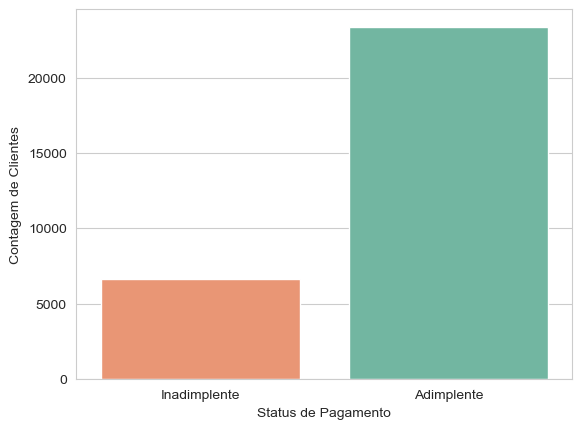

In [16]:
# Criação do gráfico de barras empilhadas utilizando a biblioteca Seaborn

new_palette = sns.color_palette(["#fc8d62", "#66c2a5", "#8da0cb", "#e78ac3"], desat = 1)

sns.set_palette(new_palette)
sns.set_style('whitegrid')
sns.countplot(x="Status Pagamento", data=df)

# Configurações de legenda 
plt.xlabel('Status de Pagamento')
plt.ylabel('Contagem de Clientes')

# Exibição do gráfico
plt.show()

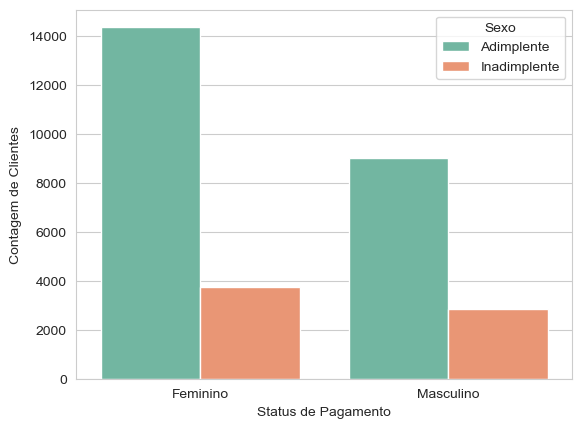

In [17]:
# Calcular a contagem de valores em cada categoria
counts = df.groupby(['Status Pagamento', 'Sexo']).size().reset_index(name='Contagem de Clientes')

# Criação do gráfico de barras empilhadas utilizando a biblioteca Seaborn

new_palette = sns.color_palette(["#66c2a5","#fc8d62", "#8da0cb", "#e78ac3"], desat = 1)

sns.set_palette(new_palette)
sns.set_style('whitegrid')
sns.barplot(data=counts, x='Sexo', y='Contagem de Clientes', hue='Status Pagamento')

# Configurações de legenda
plt.xlabel('Status de Pagamento')
plt.ylabel('Contagem de Clientes')
plt.legend(title='Sexo')

# Exibição do gráfico
plt.show()

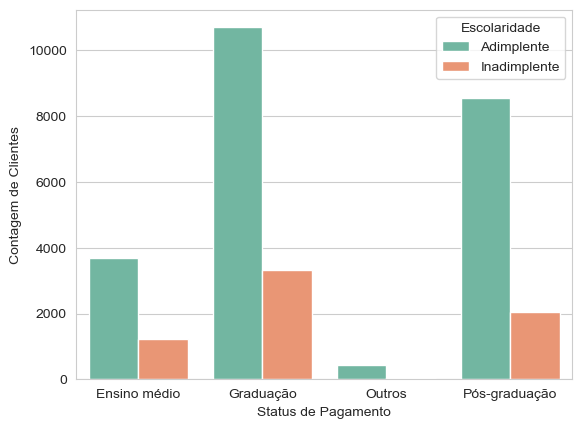

In [18]:
# Calcular a contagem de valores em cada categoria
counts = df.groupby(['Status Pagamento', 'Escolaridade']).size().reset_index(name='Contagem de Clientes')

# Criação do gráfico de barras empilhadas utilizando a biblioteca Seaborn

sns.set_palette(new_palette)
sns.set_style('whitegrid')
sns.barplot(data=counts, x='Escolaridade', y='Contagem de Clientes', hue='Status Pagamento')

# Configurações de legenda 
plt.xlabel('Status de Pagamento')
plt.ylabel('Contagem de Clientes')
plt.legend(title='Escolaridade')

# Exibição do gráfico
plt.show()

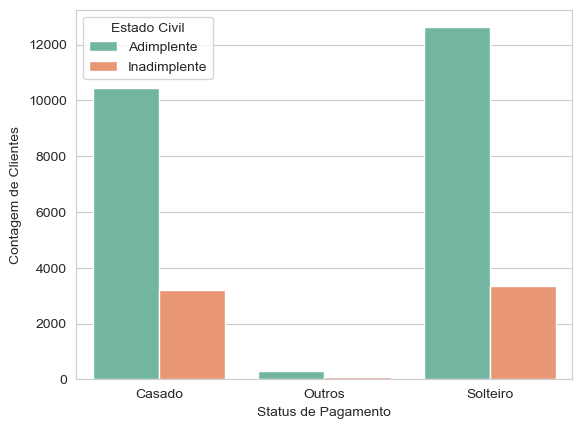

In [19]:
# Calcular a contagem de valores em cada categoria
counts = df.groupby(['Status Pagamento', 'Est_Civil']).size().reset_index(name='Contagem de Clientes')

# Criação do gráfico de barras empilhadas utilizando a biblioteca Seaborn

sns.set_palette(new_palette)
sns.set_style('whitegrid')
sns.barplot(data=counts, x='Est_Civil', y='Contagem de Clientes', hue='Status Pagamento')

# Configurações de legenda 
plt.xlabel('Status de Pagamento')
plt.ylabel('Contagem de Clientes')
plt.legend(title='Estado Civil')

# Exibição do gráfico
plt.show()

A quantidade de cliente inadimplentes é de aproximadamente 22% do total de clientes, quando visualizamos as variáveis *Sexo*, *Escolaridade* e *Estado Civil* em relação a variável *Status Pagamento*, podem suspeitar que pessoas do sexo masculino, escolariadde ensino médio e estado civil casado representam uma maior proporção de inadimplência em relação aos demais grupos de cada variável indvidualmente.. 

Para poder visualizar melhor a variável *limite de crédito* criei as seguintes categorias para essas variáveis.

Silver - Limite de crédito $< NT\$ 50000$

Gold - $ NT\$ 50000 \geq$ Limite de crédito $ < NT\$ 250000 $

Platinum - $ NT\$ 250000 \geq $ Limite de crédito $ < NT\$500000$

Black - Limite de crédito $ \geq NT\$ 500000 $

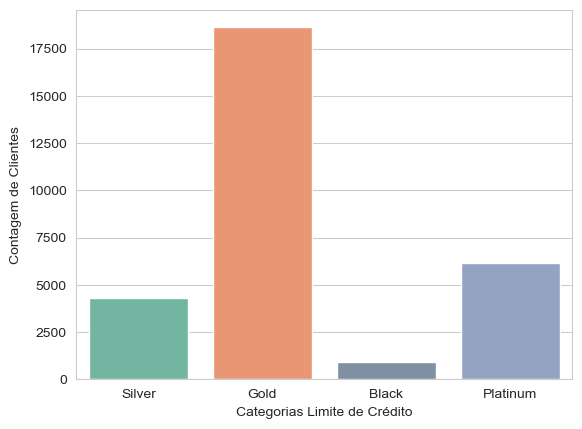

In [20]:
# função que classifica os valores da coluna 'Limite_Credito'
def categorias_credito(valor):
    if valor < 50000:
        return 'Silver'
    elif valor < 250000:
        return 'Gold'
    elif valor < 500000:
        return 'Platinum'
    else:
        return 'Black'

# criar uma nova coluna 'Categorias_credito'
df['Categorias_credito'] = df['Limite_Credito'].apply(categorias_credito)

# criando o dicionário de mapeamento de categorias para valores numéricos
mapeamento = {'Silver': 1, 'Gold': 2, 'Platinum': 3, 'Black': 4}

# aplicando o mapeamento à coluna 'Categorias_credito'
df['Categorias_credito'] = df['Categorias_credito'].map(mapeamento)

# renomeando as categorias
df['Categorias_credito'] = df['Categorias_credito'].replace({1:'Silver', 2:'Gold', 3:'Platinum', 4:'Black'})

# Criação do gráfico de barras empilhadas utilizando a biblioteca Seaborn

new_palette = sns.color_palette(["#66c2a5", "#fc8d62", "#7890A8" ,"#8da0cb"], desat = 1)

sns.set_palette(new_palette)

sns.set_style('whitegrid')
sns.countplot(x="Categorias_credito", data=df)

# Configurações de legenda e título
plt.xlabel('Categorias Limite de Crédito')
plt.ylabel('Contagem de Clientes')

# Exibição do gráfico
plt.show()

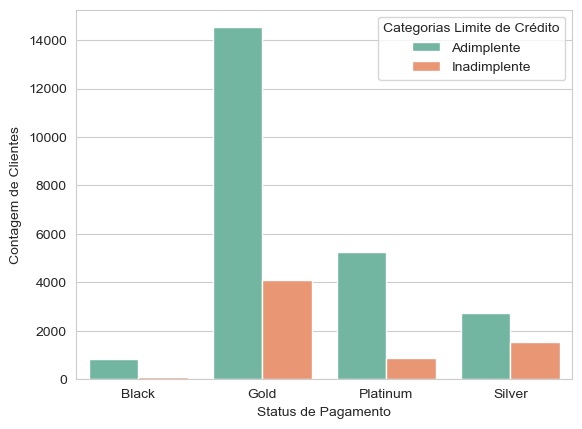

In [21]:
# Calcular a contagem de valores em cada categoria
counts = df.groupby(['Status Pagamento', 'Categorias_credito']).size().reset_index(name='Contagem de Clientes')

# Criação do gráfico de barras empilhadas utilizando a biblioteca Seaborn

new_palette = sns.color_palette(["#66c2a5","#fc8d62", "#8da0cb", "#e78ac3"], desat = 1)

sns.set_palette(new_palette)
sns.set_style('whitegrid')
sns.barplot(data=counts, x='Categorias_credito', y='Contagem de Clientes', hue='Status Pagamento')

# Configurações de legenda e título
plt.xlabel('Status de Pagamento')
plt.ylabel('Contagem de Clientes')
plt.legend(title='Categorias Limite de Crédito')

# Exibição do gráfico
plt.show()

Observe que a categoria *Silver* que é a terceira categoria com maior quantidade de clientes a que possui maior proporção de clientes com inadimplência. A categoria *Gold* é a que possui maior número de clientes, e consequentemente é a que concentra maiores quantidades de cliente de ambas as categorias, porém uma proporção de inadimplência menor, comparada com a *silver*.

A seguir criei cinco faixas etárias para a variável *Idade*.

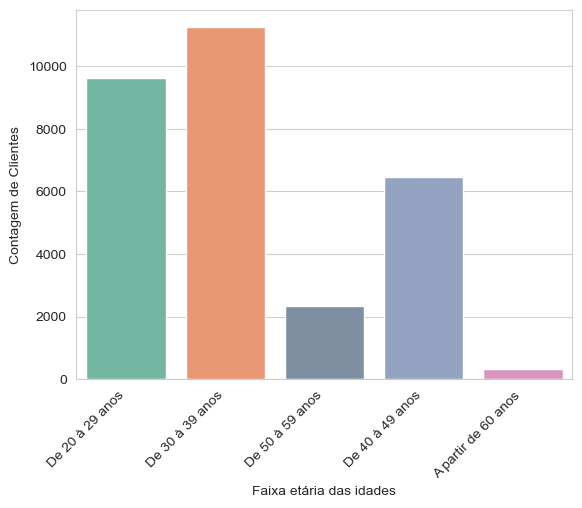

In [22]:
# função que classifica os valores da coluna 'Limite_Credito'
def faixa_etaria(valor):
    if valor < 30:
        return 'De 20 à 29 anos'
    elif valor < 40:
        return 'De 30 à 39 anos'
    elif valor < 50:
        return 'De 40 à 49 anos'
    elif valor < 60:
        return 'De 50 à 59 anos'
    else:
        return 'A partir de 60 anos'

# criar uma nova coluna 'Categorias_credito'
df['faixa_etaria'] = df['Idade'].apply(faixa_etaria)

# criando o dicionário de mapeamento de categorias para valores numéricos
mapeamento = {'De 20 à 29 anos': 1, 'De 30 à 39 anos': 2, 'De 40 à 49 anos': 3,
              'De 50 à 59 anos': 4, 'A partir de 60 anos': 5}

# aplicando o mapeamento à coluna 'faixa etária'
df['faixa_etaria'] = df['faixa_etaria'].map(mapeamento)

# renomeando as categorias
df['faixa_etaria'] = df['faixa_etaria'].replace({1:'De 20 à 29 anos', 2:'De 30 à 39 anos', 3:'De 40 à 49 anos',
                                                             4:'De 50 à 59 anos', 5:'A partir de 60 anos'})

# Criação do gráfico de barras empilhadas utilizando a biblioteca Seaborn

new_palette = sns.color_palette([ "#66c2a5","#fc8d62","#7890A8", "#8da0cb", '#e78ac3'], desat = 1)

sns.set_palette(new_palette)
sns.set_style('whitegrid')
sns.countplot(x="faixa_etaria", data=df)

# Configurações de legenda e título
plt.xlabel('Faixa etária das idades')
plt.ylabel('Contagem de Clientes')

# Ajuste das labels do eixo X
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Exibição do gráfico
plt.show()

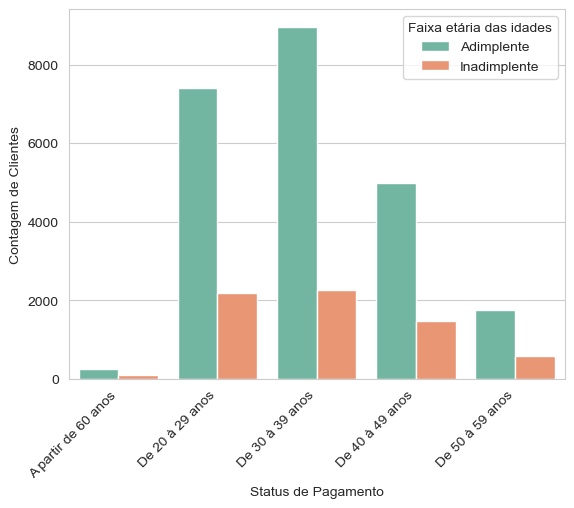

In [24]:
# Calcular a contagem de valores em cada categoria
counts = df.groupby(['Status Pagamento', 'faixa_etaria']).size().reset_index(name='Contagem de Clientes')

# Criação do gráfico de barras empilhadas utilizando a biblioteca Seaborn

sns.set_palette(new_palette)
sns.set_style('whitegrid')
sns.barplot(data=counts, x='faixa_etaria', y='Contagem de Clientes', hue='Status Pagamento')

# Configurações de legenda e título
plt.xlabel('Status de Pagamento')
plt.ylabel('Contagem de Clientes')
plt.legend(title='Faixa etária das idades')

# Ajuste das labels do eixo X
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


# Exibição do gráfico
plt.show()

A proporção de clientes inadimplentes parace ser maior a partir da faixa de 40 à 49 anos.

Mas, será que essas diferenças que visualizamos, é significativo do ponto de visa estatístico? Veremos isso a seguir com testes estatísticos.

Do ponto de vista do negócio, deseja-se a partir dessa análise exploratória avaliar se atributos, como, sexo, escolaridade, estado civil e categoria de limite de crédito e idade estão de algumas forma associadas inadimplência de cartão de crédito. Portanto desejamos testar as seguintes hipóteses:

$H_0$ (Hipótese nula): Não existe associação entre os atributos (sexo, escolaridade, estado civil, categoria de limite de crédito e idade) e a inadimplência de clientes, que é equivalente dizer que a variável *Status Pagamento* é independente das variáveis categóricas explicativas.

$H_1$ (Hipótese alternativa): É de que existe associação entre os atributos (sexo, escolaridade, estado civil, categoria de limite de crédito e idade) e o Status de Pagamento, ou seja, elas são dependentes.

## Teste qui-quadrado

O teste qui-quadrado pode avaliar se existe associação entre as variáveis, mas não pode determinar o grau de associação, em caso de existir associação entre as variáveis, essa associação pode ser medida pela razão de possibilidades, mais conhecida por razão de chaces ou *odds ratio*.

A seguir os testes para cada uma das variáveis categóricas preditivas. O nível de significância considerado é de 5% ($ \alpha = 0.05 $)

In [25]:
from scipy.stats import chi2_contingency

# Cria uma tabela de contingência entre as variáveis sexo e inadimplência
contingency_table = pd.crosstab(df['Sexo'], df['Status Pagamento'])

# Aplica o teste qui-quadrado
stat, p, dof, expected = chi2_contingency(contingency_table)

# Imprime os resultados do teste
print(f"Qui-quadrado: {stat}")
print(f"P-valor: {p}")
print(f"Graus de liberdade: {dof}")
print("Expected values:") 
print(expected)
contingency_table

Qui-quadrado: 47.708796890621116
P-valor: 4.944678999412026e-12
Graus de liberdade: 1
Expected values:
[[14105.6256  4006.3744]
 [ 9258.3744  2629.6256]]


Status Pagamento,Adimplente,Inadimplente
Sexo,,
Feminino,14349,3763
Masculino,9015,2873


In [26]:
contingency_table = pd.crosstab(df['Escolaridade'], df['Status Pagamento'])

stat, p, dof, expected = chi2_contingency(contingency_table)

# Imprime os resultados do teste
print(f"Qui-quadrado: {stat}")
print(f"P-valor: {p}")
print(f"Graus de liberdade: {dof}")
print("Expected values:")
print(expected)
contingency_table

Qui-quadrado: 160.40995107224546
P-valor: 1.4950645648106153e-34
Graus de liberdade: 3
Expected values:
[[ 3829.3596  1087.6404]
 [10926.564   3103.436 ]
 [  364.4784   103.5216]
 [ 8243.598   2341.402 ]]


Status Pagamento,Adimplente,Inadimplente
Escolaridade,,
Ensino médio,3680,1237
Graduação,10700,3330
Outros,435,33
Pós-graduação,8549,2036


In [27]:
contingency_table = pd.crosstab(df['Est_Civil'], df['Status Pagamento'])

stat, p, dof, expected = chi2_contingency(contingency_table)

# Imprime os resultados do teste
print(f"Qui-quadrado: {stat}")
print(f"P-valor: {p}")
print(f"Graus de liberdade: {dof}")
print("Expected values:")
print(expected)
contingency_table

Qui-quadrado: 28.13032464482199
P-valor: 7.790720364202813e-07
Graus de liberdade: 2
Expected values:
[[10637.6292  3021.3708]
 [  293.6076    83.3924]
 [12432.7632  3531.2368]]


Status Pagamento,Adimplente,Inadimplente
Est_Civil,,
Casado,10453,3206
Outros,288,89
Solteiro,12623,3341


In [28]:
contingency_table = pd.crosstab(df['Categorias_credito'], df['Status Pagamento'])

stat, p, dof, expected = chi2_contingency(contingency_table)

# Imprime os resultados do teste
print(f"Qui-quadrado: {stat}")
print(f"P-valor: {p}")
print(f"Graus de liberdade: {dof}")
print("Expected values:") 
print(expected)
contingency_table

Qui-quadrado: 763.7881018002082
P-valor: 3.086846414235927e-165
Graus de liberdade: 3
Expected values:
[[  722.7264   205.2736]
 [14502.8136  4119.1864]
 [ 4781.0532  1357.9468]
 [ 3357.4068   953.5932]]


Status Pagamento,Adimplente,Inadimplente
Categorias_credito,,
Black,824,104
Gold,14529,4093
Platinum,5255,884
Silver,2756,1555


In [29]:
contingency_table = pd.crosstab(df['faixa_etaria'], df['Status Pagamento'])

stat, p, dof, expected = chi2_contingency(contingency_table)

# Imprime os resultados do teste
print(f"Qui-quadrado: {stat}")
print(f"P-valor: {p}")
print(f"Graus de liberdade: {dof}")
print("Expected values:") 
print(expected)
contingency_table

Qui-quadrado: 46.16525003256573
P-valor: 2.2753444498438286e-09
Graus de liberdade: 4
Expected values:
[[ 264.0132   74.9868]
 [7490.4984 2127.5016]
 [8752.1544 2485.8456]
 [5034.1632 1429.8368]
 [1823.1708  517.8292]]


Status Pagamento,Adimplente,Inadimplente
faixa_etaria,,
A partir de 60 anos,243,96
De 20 à 29 anos,7421,2197
De 30 à 39 anos,8962,2276
De 40 à 49 anos,4979,1485
De 50 à 59 anos,1759,582


**Conclusão do teste qui-quadrado:** A hipótese de associação entre as variáveis foi aceita para todas as variáveis preditivas avaliadas, ou seja, o sexo, a escolaridade, o estado civil, a categoria de limite de crédito e a faixa etária estão associadas ao status de pagamento. A seguir é obtida a razão de chances para cada uma das variáveis. Lembrando que quando duas variáveis estão associadas isso não quer dizer necessariamente que exista uma relação de causa e efeito, apenas algum grau de associação.

## Razão de Chances

A razão de chances pode ser definida como a razão entre a chance de um determinado evento acontecer em um grupo 1 (G1) e a chance desse mesmo evento acontecer no grupo 2 (G2). A chance é obtida pela a razão entre a probabilidade de ocorrência de um determinado evento de interesse e a probabilidade desse evento não acontecer. Para ilustrar utilizei a variável *sexo*, como exemplo:

Considere o G1 (Masculino) e G2 (Feminino) qual a chance de inadimplência para ambos os grupos? Da tabela de contigência anterior, temos o seguinte:

$ ChanceF = \frac{3762}{14349} $ e $ ChanceM = \frac{2873}{9017} $

Temos a chance para cada um dos grupos, neste caso, basta dividir uma pela a outra e obtemos a razão de chances. Neste caso, suspeitamos que clientes do sexo masculino tenham maior chance de inadimplência se comparado com cliente do sexo feminino, então, o sexo feminino será nossa variável de referência, o cálculo fica da seguinte maneira:

$ OR (odds \hspace{0.2cm} ratio) = \frac{ChanceM}{ChanceF} = 1.21$

A seguir são obtidas as razões de chances para as variáveis, a partir da tabela de contigência.

**Razão de chance de inadimplência entre cliente do sexo masculino em relação a clientes do sexo feminino**

In [30]:
contingency_table = pd.crosstab(df['Sexo'], df['Status Pagamento'])

chanceM = contingency_table.loc['Masculino', 'Inadimplente'] / contingency_table.loc['Masculino', 'Adimplente']
chanceF = contingency_table.loc['Feminino', 'Inadimplente'] / contingency_table.loc['Feminino', 'Adimplente']
OR = chanceM/chanceF
print('Razão de Chances Masculino e Feminino: {}'.format(OR))

Razão de Chances Masculino e Feminino: 1.215226725941307


Uma razão de chance de 1.21, significa que cliente do sexo masculino possuem 21% mais chance de ficarem inadimplentes em relação a clientes do sexo feminino.

**Razão de chance de inadimplência entre os níveis de escolaridade, tendo como referência clientes com pós-graduação**

In [31]:
contingency_table = pd.crosstab(df['Escolaridade'], df['Status Pagamento'])

chanceE = contingency_table.loc['Ensino médio', 'Inadimplente'] / contingency_table.loc['Ensino médio', 'Adimplente']
chanceG = contingency_table.loc['Graduação', 'Inadimplente'] / contingency_table.loc['Graduação', 'Adimplente']
chanceO = contingency_table.loc['Outros', 'Inadimplente'] / contingency_table.loc['Outros', 'Adimplente']
chanceP = contingency_table.loc['Pós-graduação', 'Inadimplente'] / contingency_table.loc['Pós-graduação', 'Adimplente']
OR_Grad = chanceE/chanceP
OR_Outros = chanceG/chanceP
OR_Pos = chanceO/chanceP                   
print('Razão de Chances Ensino médio e Pós-graduação: {}'.format(OR_Grad))
print('Razão de Chances Graduação e Pós-graduação: {}'.format(OR_Outros))
print('Razão de Chances Outros e Pós-graduação: {}'.format(OR_Pos))                                          

Razão de Chances Ensino médio e Pós-graduação: 1.4114302607414366
Razão de Chances Graduação e Pós-graduação: 1.3067665203899896
Razão de Chances Outros e Pós-graduação: 0.3185387168890996


Cliente com ensino médio e graduação possuem, respectivamente, 41% e 31% mais chance de inadimplência em relação a clientes com pós-graduação. clientes que não possui nem ensino médio, nem graduação tem 69% menos chance de ficar inadimplente em relação a pós-graduados.

**Razão de chance de inadimplência entre estado civil, tendo como referência clientes casados**

In [32]:
contingency_table = pd.crosstab(df['Est_Civil'], df['Status Pagamento'])

chanceC = contingency_table.loc['Casado', 'Inadimplente'] / contingency_table.loc['Casado', 'Adimplente']
chanceO = contingency_table.loc['Outros', 'Inadimplente'] / contingency_table.loc['Outros', 'Adimplente']
chanceS = contingency_table.loc['Solteiro', 'Inadimplente'] / contingency_table.loc['Solteiro', 'Adimplente']
OR_Casado = chanceO/chanceC
OR_Solteiro = chanceS/chanceC  
print('Razão de Chances Outros e Casado: {}'.format(OR_Casado))
print('Razão de Chances Solteiro e Casado: {}'.format(OR_Solteiro))

Razão de Chances Outros e Casado: 1.0075693578013447
Razão de Chances Solteiro e Casado: 0.8629613115984255


Clientes com estado civil não definido (outros) e casados, não possui nenhuma associação. Já os clientes solteiros possui 14% menos chances de ficar inadimplente se comprarado com cliente casados. Conforme suspeitava-se clientes casados tem maior chance de inadimplência que os clientes solteiros.

**Razão de chance de inadimplência entre categorias de credito, tendo como referência clientes Black**

In [35]:
contingency_table = pd.crosstab(df['Categorias_credito'], df['Status Pagamento'])

chanceS = contingency_table.loc['Silver', 'Inadimplente'] / contingency_table.loc['Silver', 'Adimplente']
chanceG = contingency_table.loc['Gold', 'Inadimplente'] / contingency_table.loc['Gold', 'Adimplente']
chanceP = contingency_table.loc['Platinum', 'Inadimplente'] / contingency_table.loc['Platinum', 'Adimplente']
chanceB = contingency_table.loc['Black', 'Inadimplente'] / contingency_table.loc['Black', 'Adimplente']
OR_Gold = chanceG/chanceB
OR_Platinum = chanceP/chanceB
OR_Black = chanceS/chanceB
print('Razão de Chances entre Gold e Black: {}'.format(OR_Gold))
print('Razão de Chances entre Platinum e Black: {}'.format(OR_Platinum))
print('Razão de Chances entre Silver e Black: {}'.format(OR_Black))

Razão de Chances entre Gold e Black: 2.232029310080105
Razão de Chances entre Platinum e Black: 1.3328258801141768
Razão de Chances entre Silver e Black: 4.470386290052473


A interpretação segue a mesma lógica usada nas interpretações anteriores. Pode-se observar que os clientes que tendem a ter maior inadimplência estão na categoria Silver.

**Razão de chance de inadimplência entre faixa etária, tendo como referência clientes de 30 à 39 anos**

In [36]:
contingency_table = pd.crosstab(df['faixa_etaria'], df['Status Pagamento'])

chance1 = contingency_table.loc['A partir de 60 anos','Inadimplente']/contingency_table.loc['A partir de 60 anos', 'Adimplente']
chance2 = contingency_table.loc['De 20 à 29 anos', 'Inadimplente'] / contingency_table.loc['De 20 à 29 anos', 'Adimplente']
chance3 = contingency_table.loc['De 30 à 39 anos', 'Inadimplente'] / contingency_table.loc['De 30 à 39 anos', 'Adimplente']
chance4 = contingency_table.loc['De 40 à 49 anos', 'Inadimplente'] / contingency_table.loc['De 40 à 49 anos', 'Adimplente']
chance5 = contingency_table.loc['De 50 à 59 anos', 'Inadimplente'] / contingency_table.loc['De 50 à 59 anos', 'Adimplente']
OR_1 = chance4/chance3
OR_2 = chance5/chance3
OR_3 = chance1/chance3
OR_4 = chance2/chance3
print('Razão de Chances De 40 à 49 anos e De 30 à 39 anos: {}'.format(OR_1))
print('Razão de Chances De 50 à 59 anos e De 30 à 39 anos: {}'.format(OR_2))
print('Razão de Chances A partir de 60 anos e De 30 à 39 anos: {}'.format(OR_3))
print('Razão de Chances De 20 à 29 anos e De 30 à 39 anos: {}'.format(OR_4))

Razão de Chances De 40 à 49 anos e De 30 à 39 anos: 1.174402614001654
Razão de Chances De 50 à 59 anos e De 30 à 39 anos: 1.30283622964398
Razão de Chances A partir de 60 anos e De 30 à 39 anos: 1.5555989498578835
Razão de Chances De 20 à 29 anos e De 30 à 39 anos: 1.1657362649906489


Observe que razão de chance inferior a 1, significa que o grupo em questão tem menos chance do que o grupo utilizado como referência, neste link, você poderá visualizar essa mesma análise feita em R, só que, com os intervalos de confiânça.

Na análise em R, inverti as faixas etária para que a leitura ficasse mais fácil, neste caso, cliente com idade entre 30 e 39 anos possui menos chance de inadimplência se comparado com os demais, e foi a categoria utilizada como referência. 

falor do visual em power bi, aqui.


Retornando as variáveis para o tipo númerico.

In [38]:
df['Status Pagamento'] = df['Status Pagamento'].replace({'Inadimplente':1 , 'Adimplente':0})
df['Sexo'] = df['Sexo'].replace({'Masculino':1, 'Feminino':2})
df['Escolaridade'] = df['Escolaridade'].replace({'Pós-graduação':1,'Graduação':2,'Ensino médio':3,'Outros':4})
df['Est_Civil'] = df['Est_Civil'].replace({'Casado':1, 'Solteiro':2, 'Outros':3})

## Modelagem 

O modelo apresentado utiliza as variáveis originais. Portanto, utilizei as variáveis *limite de crédito* e *idade* ao invés de usar as categorias oi faicas etárias criadas.

Para este caso, a ideia é obter um modelo capaz de prever a probabilidade de o cliente ficar inadimplente no próximo mês, ao invés da classificação em si. Como uma única metrica de avaliação de modelo em muitas situações não é suficiente para tomar a melhor decisão, varias métricas foram utilizadas neste caso. 

Do ponto de vista do negócio, imagine que a empresa deseja enviar uma mensagem para os clientes que tiverem maior probabilidade de inadimplência (ou assim sejam classificados), com intuito de incentivar o pagamento da fatura até o vencimento. O que seria péssimo para empresa neste caso seria o modelo prever que o cliente o status de pagamento será adimplente, quando na verdade será inadimplente, ou seja, o modelo prever que o cliente vai pagar quando na verdade ele não vai, e neste caso a empresa deixou de enviar um incentivo para aquele cliente. Então, considerando esse contexto, desejamos então o menor número possível de *falsos negativos* (FN) ao mesmo tempo que queremos o modelo com a maior probabilidade de acerto na classe positiva. 


## Divisão previsões e classe

In [39]:
X_df = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].values # 0,1,2,3,4,5,24,25,26
X_df

array([[ 20000,      2,      2, ...,      0,      0,      0],
       [120000,      2,      2, ...,   1000,      0,   2000],
       [ 90000,      2,      2, ...,   1000,   1000,   5000],
       ...,
       [ 30000,      1,      2, ...,   4200,   2000,   3100],
       [ 80000,      1,      3, ...,   1926,  52964,   1804],
       [ 50000,      1,      2, ...,   1000,   1000,   1000]], dtype=int64)

In [40]:
y_df = df.iloc[:, 23].values
y_df

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

## Escalonamento de variáveis

In [41]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_df = scaler_census.fit_transform(X_df)
X_df[0]

array([-1.13672015,  0.81016074,  0.21186989, -1.06879721, -1.24601985,
        1.79456386,  1.78234817, -0.69666346, -0.66659873, -1.53004603,
       -1.48604076, -0.64250107, -0.64739923, -0.66799331, -0.67249727,
       -0.66305853, -0.65272422, -0.34194162, -0.22708564, -0.29680127,
       -0.30806256, -0.31413612, -0.29338206])

## Divisão entre treinamento e teste

In [42]:
from sklearn.model_selection import train_test_split
seed=1336
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.30, stratify = y_df)

In [43]:
X_train.shape, y_train.shape

((21000, 23), (21000,))

In [44]:
X_test.shape, y_test.shape

((9000, 23), (9000,))

## Modelos de Machine Learning 

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

Observe que utilizo tanto o *predict* - capacidade do modelo de distinguir entre ambas as classes, quanto o *predict_proba* - capacidade de classificar corretamente a classe positiva, e para ambos avalio usando a *Area Under the Curve* (AUC).

### Random Forest

In [ ]:
def run_random_forest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10, min_samples_split=5, 
                                min_samples_leaf=8, max_features=9)
    rf.fit(X_train, y_train) #treinando o modelo
    score = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
    print('Resultado Fase de Treinamento')
    print("Pontações da validação cruzada (acurácia) {}".format(score))
    print("Média das pontuação da validação cruzada (acurácia):{}".format(score.mean()))
    
    pred_proba_train = rf.predict_proba(X_train)[:, 1] # Probabilidade da classe positiva para os dados de treino
    print('\nAUC probabilidade (Random Forest) - Treino: {}'.format(roc_auc_score(y_train, pred_proba_train)))
    pred_class_train = rf.predict(X_train) # previsão de ambas as classes para os dados de treino 
    print('\nAUC previsão (Random Forest) - Treino: {}'.format(roc_auc_score(y_train, pred_class_train)))
    print('Classificação report do Random Forest (Treino):\n {}'.format(classification_report(y_train, pred_class_train)))
    
    print('Resultado Fase de Teste')
    pred_proba_test = rf.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva para os dados de teste
    print('\nAUC probabilidade (Random Forest) - Teste: {}'.format(roc_auc_score(y_test, pred_proba_test)))
    pred_class_test = rf.predict(X_test) # previsão de ambas as classes positiva para os dados de teste
    print('\nAUC previsão (Random Forest) - Teste: {}'.format(roc_auc_score(y_test, pred_class_test)))
    print('Matriz de confusão AUC (Random Forest) - Teste:\n{}'.format(confusion_matrix(y_test, pred_class_test)))
    print('Classificação report do Random Forest (Teste):\n {}'.format(classification_report(y_test, pred_class_test)))
    return pred_proba_train, pred_class_train, pred_proba_test, pred_class_test

pred_proba_train, pred_class_train, pred_proba_test, pred_class_test = run_random_forest(X_train,X_test,y_train, y_test)

### Regressão Logística

In [47]:
def run_Reg_log(X_train, X_test, y_train, y_test):
    rl = LogisticRegression(random_state=0)
    rl.fit(X_train, y_train) #treinando o modelo
    score = cross_val_score(rl, X_train, y_train, cv=5, scoring='accuracy')
    print('Resultado Fase de Treinamento')
    print("Pontações da validação cruzada (acurácia) {}".format(score))
    print("Média das pontuação da validação cruzada (acurácia):{}".format(score.mean()))
    
    pred_proba_train = rl.predict_proba(X_train)[:, 1] # Probabilidade da classe positiva para os dados de treino
    print('\nAUC probabilidade (Regressão Logística) - Treino: {}'.format(roc_auc_score(y_train, pred_proba_train)))
    pred_class_train = rl.predict(X_train) # previsão de ambas as classes para os dados de treino 
    print('\nAUC previsão (Regressão Logística) - Treino: {}'.format(roc_auc_score(y_train, pred_class_train)))
    print('Classificação report do Regressão Logística (Treino):\n {}'.format(classification_report(y_train, pred_class_train)))
    
    print('Resultado Fase de Teste')
    pred_proba_test = rl.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva para os dados de teste
    print('\nAUC probabilidade (Regressão Logística) - Teste: {}'.format(roc_auc_score(y_test, pred_proba_test)))
    pred_class_test = rl.predict(X_test) # previsão de ambas as classes positiva para os dados de teste
    print('\nAUC previsão (Regressão Logística) - Teste: {}'.format(roc_auc_score(y_test, pred_class_test)))
    print('Matriz de confusão AUC (Regressão Logística) - Teste:\n{}'.format(confusion_matrix(y_test, pred_class_test)))
    print('Classificação report do Regressão Logística (Teste):\n {}'.format(classification_report(y_test, pred_class_test)))
    return pred_proba_train, pred_class_train, pred_proba_test, pred_class_test

pred_proba_train, pred_class_train, pred_proba_test, pred_class_test = run_Reg_log(X_train,X_test, y_train, y_test)

Resultado Fase de Treinamento
Pontações da validação cruzada (acurácia) [0.80952381 0.81238095 0.81119048 0.80880952 0.80785714]
Média das pontuação da validação cruzada (acurácia):0.809952380952381

AUC probabilidade classe positiva (Regressão Logística) - Treino: 0.7213714414338221

AUC previsão de ambas as classes (Regressão Logística) - Treino: 0.6016425784341568
Classificação report do Regressão Logística (Treino):
               precision    recall  f1-score   support

           0       0.82      0.98      0.89     16355
           1       0.72      0.23      0.35      4645

    accuracy                           0.81     21000
   macro avg       0.77      0.60      0.62     21000
weighted avg       0.80      0.81      0.77     21000

Resultado Fase de Teste

AUC probabilidade classe positiva (Regressão Logística) - Teste: 0.7303136979870681

AUC previsão de ambas as classes (Regressão Logística) - Teste: 0.6021798478371676
Matriz de confusão AUC (Regressão Logística) - Teste:
[

### XGBoost

In [48]:
def run_XGBoost(X_train, X_test, y_train, y_test):
    xgboost = xgb.XGBClassifier(random_state=0, max_depth=10, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, 
                                reg_alpha=1, reg_lambda=1)
    xgboost.fit(X_train, y_train)
    score = cross_val_score(xgboost, X_train, y_train, cv=5, scoring='accuracy')
    print('Resultado Fase de Treinamento')
    print("Pontações da validação cruzada (acurácia) {}".format(score))
    print("Média das pontuação da validação cruzada (acurácia):{}".format(score.mean()))
    
    pred_proba_train = xgboost.predict_proba(X_train)[:, 1] # Probabilidade da classe positiva para os dados de treino
    print('\nAUC probabilidade (XGBoost) - Treino: {}'.format(roc_auc_score(y_train, pred_proba_train)))
    pred_class_train = xgboost.predict(X_train) # previsão de ambas as classes para os dados de treino 
    print('\nAUC previsão (XGBoost) - Treino: {}'.format(roc_auc_score(y_train, pred_class_train)))
    print('Classificação report do XGBoost (Treino):\n {}'.format(classification_report(y_train, pred_class_train)))
    
    print('Resultado Fase de Teste')
    pred_proba_test = xgboost.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva para os dados de teste
    print('\nAUC probabilidade (XGBoost) - Teste: {}'.format(roc_auc_score(y_test, pred_proba_test)))
    pred_class_test = xgboost.predict(X_test) # previsão de ambas as classes positiva para os dados de teste
    print('\nAUC previsão (XGBoost) - Teste: {}'.format(roc_auc_score(y_test, pred_class_test)))
    print('Matriz de confusão AUC (XGBoost) - Teste:\n{}'.format(confusion_matrix(y_test, pred_class_test)))
    print('Classificação report do XGBoost (Teste):\n {}'.format(classification_report(y_test, pred_class_test)))
    return pred_proba_train, pred_class_train, pred_proba_test, pred_class_test

pred_proba_train, pred_class_train, pred_proba_test, pred_class_test = run_XGBoost(X_train,X_test, y_train, y_test)

Resultado Fase de Treinamento
Pontações da validação cruzada (acurácia) [0.81261905 0.81761905 0.81428571 0.81666667 0.81190476]
Média das pontuação da validação cruzada (acurácia):0.8146190476190475

AUC probabilidade (XGBoost) - Treino: 0.9821949684065107

AUC previsão (XGBoost) - Treino: 0.8300993267317349
Classificação report do XGBoost (Treino):
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     16355
           1       0.96      0.67      0.79      4645

    accuracy                           0.92     21000
   macro avg       0.94      0.83      0.87     21000
weighted avg       0.92      0.92      0.92     21000

Resultado Fase de Teste

AUC probabilidade (XGBoost) - Teste: 0.7769032554040622

AUC previsão (XGBoost) - Teste: 0.6525897785576541
Matriz de confusão AUC (XGBoost) - Teste:
[[6638  371]
 [1278  713]]
Classificação report do XGBoost (Teste):
               precision    recall  f1-score   support

           0       0

### LightGBM 

In [49]:
def run_LightGBM(X_train, X_test, y_train, y_test):
    gbm = lgb.LGBMClassifier(random_state=0, max_depth=10, learning_rate=0.1)
    gbm.fit(X_train, y_train)
    score = cross_val_score(gbm, X_train, y_train, cv=5, scoring='accuracy')
    print('Resultado Fase de Treinamento')
    print("Pontações da validação cruzada (acurácia) {}".format(score))
    print("Média das pontuação da validação cruzada (acurácia):{}".format(score.mean()))
    
    pred_proba_train = gbm.predict_proba(X_train)[:, 1] # Probabilidade da classe positiva para os dados de treino
    print('\nAUC probabilidade (LightGBM) - Treino: {}'.format(roc_auc_score(y_train, pred_proba_train)))
    pred_class_train = gbm.predict(X_train) # previsão de ambas as classes para os dados de treino 
    print('\nAUC previsão (LightGBM) - Treino: {}'.format(roc_auc_score(y_train, pred_class_train)))
    print('Classificação report do LightGBM (Treino):\n {}'.format(classification_report(y_train, pred_class_train)))
    
    print('Resultado Fase de Teste')
    pred_proba_test = gbm.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva para os dados de teste
    print('\nAUC probabilidade (LightGBM) - Teste: {}'.format(roc_auc_score(y_test, pred_proba_test)))
    pred_class_test = gbm.predict(X_test) # previsão de ambas as classes positiva para os dados de teste
    print('\nAUC previsão (LightGBM) - Teste: {}'.format(roc_auc_score(y_test, pred_class_test)))
    print('Matriz de confusão AUC (LightGBM) - Teste:\n{}'.format(confusion_matrix(y_test, pred_class_test)))
    print('Classificação report do LightGBM (Teste):\n {}'.format(classification_report(y_test, pred_class_test)))
    return pred_proba_train, pred_class_train, pred_proba_test, pred_class_test

pred_proba_train, pred_class_train, pred_proba_test, pred_class_test = run_LightGBM(X_train,X_test, y_train, y_test)

Resultado Fase de Treinamento
Pontações da validação cruzada (acurácia) [0.81333333 0.82261905 0.82047619 0.81880952 0.81642857]
Média das pontuação da validação cruzada (acurácia):0.8183333333333334

AUC probabilidade (LightGBM) - Treino: 0.8849029159601008

AUC previsão (LightGBM) - Treino: 0.6988983002600732
Classificação report do LightGBM (Treino):
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     16355
           1       0.77      0.44      0.56      4645

    accuracy                           0.85     21000
   macro avg       0.81      0.70      0.73     21000
weighted avg       0.84      0.85      0.83     21000

Resultado Fase de Teste

AUC probabilidade (LightGBM) - Teste: 0.7833151879992997

AUC previsão (LightGBM) - Teste: 0.6651375762195395
Matriz de confusão AUC (LightGBM) - Teste:
[[6659  350]
 [1234  757]]
Classificação report do LightGBM (Teste):
               precision    recall  f1-score   support

           0 

### CatBoost

In [50]:
#{'learning_rate': 0.2, 'max_depth': 1, 'subsample': 0.8} esses hiperparamentos reduziu overfitting, mas teve um resultado ruim
def run_CatBoost(X_train, X_test, y_train, y_test):
    cb = CatBoostClassifier(random_state=0, learning_rate= 0.2, max_depth= 10, subsample= 0.8)
    cb.fit(X_train, y_train)
    score = cross_val_score(cb, X_train, y_train, cv=5, scoring='accuracy')
    print('Resultado Fase de Treinamento')
    print("Pontações da validação cruzada (acurácia) {}".format(score))
    print("Média das pontuação da validação cruzada (acurácia):{}".format(score.mean()))
    
    pred_proba_train = cb.predict_proba(X_train)[:, 1] # Probabilidade da classe positiva para os dados de treino
    print('\nAUC probabilidade (CatBoost) - Treino: {}'.format(roc_auc_score(y_train, pred_proba_train)))
    pred_class_train = cb.predict(X_train) # previsão de ambas as classes para os dados de treino 
    print('\nAUC previsão (CatBoost) - Treino: {}'.format(roc_auc_score(y_train, pred_class_train)))
    print('Classificação report do CatBoost (Treino):\n {}'.format(classification_report(y_train, pred_class_train)))
    
    print('Resultado Fase de Teste')
    pred_proba_test = cb.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva para os dados de teste
    print('\nAUC probabilidade (CatBoost) - Teste: {}'.format(roc_auc_score(y_test, pred_proba_test)))
    pred_class_test = cb.predict(X_test) # previsão de ambas as classes positiva para os dados de teste
    print('\nAUC previsão (CatBoost) - Teste: {}'.format(roc_auc_score(y_test, pred_class_test)))
    print('Matriz de confusão AUC (CatBoost) - Teste:\n{}'.format(confusion_matrix(y_test, pred_class_test)))
    print('Classificação report do CatBoost (Teste):\n {}'.format(classification_report(y_test, pred_class_test)))
    return pred_proba_train, pred_class_train, pred_proba_test, pred_class_test

pred_proba_train, pred_class_train, pred_proba_test, pred_class_test = run_CatBoost(X_train,X_test, y_train, y_test)

0:	learn: 0.5886755	total: 341ms	remaining: 5m 40s
1:	learn: 0.5268926	total: 543ms	remaining: 4m 30s
2:	learn: 0.4851421	total: 749ms	remaining: 4m 8s
3:	learn: 0.4625372	total: 944ms	remaining: 3m 55s
4:	learn: 0.4458129	total: 1.16s	remaining: 3m 50s
5:	learn: 0.4339290	total: 1.6s	remaining: 4m 24s
6:	learn: 0.4225978	total: 1.92s	remaining: 4m 32s
7:	learn: 0.4179069	total: 2.15s	remaining: 4m 27s
8:	learn: 0.4128666	total: 2.37s	remaining: 4m 20s
9:	learn: 0.4116423	total: 2.39s	remaining: 3m 56s
10:	learn: 0.4068973	total: 2.56s	remaining: 3m 49s
11:	learn: 0.4013466	total: 2.73s	remaining: 3m 44s
12:	learn: 0.3966266	total: 2.9s	remaining: 3m 39s
13:	learn: 0.3941644	total: 3.06s	remaining: 3m 35s
14:	learn: 0.3906067	total: 3.22s	remaining: 3m 31s
15:	learn: 0.3893897	total: 3.39s	remaining: 3m 28s
16:	learn: 0.3872697	total: 3.56s	remaining: 3m 25s
17:	learn: 0.3852681	total: 3.73s	remaining: 3m 23s
18:	learn: 0.3845951	total: 3.89s	remaining: 3m 20s
19:	learn: 0.3819714	tota

158:	learn: 0.1871968	total: 29.4s	remaining: 2m 35s
159:	learn: 0.1861739	total: 29.5s	remaining: 2m 35s
160:	learn: 0.1856284	total: 29.7s	remaining: 2m 34s
161:	learn: 0.1839580	total: 29.9s	remaining: 2m 34s
162:	learn: 0.1830498	total: 30.1s	remaining: 2m 34s
163:	learn: 0.1823885	total: 30.2s	remaining: 2m 34s
164:	learn: 0.1818162	total: 30.6s	remaining: 2m 34s
165:	learn: 0.1809313	total: 30.9s	remaining: 2m 35s
166:	learn: 0.1804073	total: 31.2s	remaining: 2m 35s
167:	learn: 0.1791159	total: 31.4s	remaining: 2m 35s
168:	learn: 0.1780751	total: 31.7s	remaining: 2m 36s
169:	learn: 0.1771085	total: 32s	remaining: 2m 36s
170:	learn: 0.1756209	total: 32.2s	remaining: 2m 36s
171:	learn: 0.1745213	total: 32.5s	remaining: 2m 36s
172:	learn: 0.1738372	total: 32.7s	remaining: 2m 36s
173:	learn: 0.1735620	total: 32.9s	remaining: 2m 36s
174:	learn: 0.1723142	total: 33.2s	remaining: 2m 36s
175:	learn: 0.1720256	total: 33.4s	remaining: 2m 36s
176:	learn: 0.1714269	total: 33.6s	remaining: 2m

314:	learn: 0.1012625	total: 1m 5s	remaining: 2m 21s
315:	learn: 0.1011891	total: 1m 5s	remaining: 2m 22s
316:	learn: 0.1007022	total: 1m 5s	remaining: 2m 22s
317:	learn: 0.1002202	total: 1m 6s	remaining: 2m 22s
318:	learn: 0.0998967	total: 1m 6s	remaining: 2m 22s
319:	learn: 0.0997003	total: 1m 6s	remaining: 2m 22s
320:	learn: 0.0993315	total: 1m 7s	remaining: 2m 22s
321:	learn: 0.0988889	total: 1m 7s	remaining: 2m 22s
322:	learn: 0.0985996	total: 1m 7s	remaining: 2m 22s
323:	learn: 0.0980752	total: 1m 8s	remaining: 2m 22s
324:	learn: 0.0975887	total: 1m 8s	remaining: 2m 22s
325:	learn: 0.0971954	total: 1m 8s	remaining: 2m 21s
326:	learn: 0.0968432	total: 1m 8s	remaining: 2m 21s
327:	learn: 0.0966287	total: 1m 9s	remaining: 2m 21s
328:	learn: 0.0962060	total: 1m 9s	remaining: 2m 21s
329:	learn: 0.0959563	total: 1m 9s	remaining: 2m 20s
330:	learn: 0.0953422	total: 1m 9s	remaining: 2m 20s
331:	learn: 0.0950114	total: 1m 9s	remaining: 2m 20s
332:	learn: 0.0947378	total: 1m 10s	remaining:

468:	learn: 0.0627553	total: 1m 45s	remaining: 1m 59s
469:	learn: 0.0625958	total: 1m 45s	remaining: 1m 59s
470:	learn: 0.0624697	total: 1m 45s	remaining: 1m 58s
471:	learn: 0.0623538	total: 1m 46s	remaining: 1m 58s
472:	learn: 0.0621268	total: 1m 46s	remaining: 1m 58s
473:	learn: 0.0619691	total: 1m 46s	remaining: 1m 58s
474:	learn: 0.0617473	total: 1m 46s	remaining: 1m 57s
475:	learn: 0.0615107	total: 1m 46s	remaining: 1m 57s
476:	learn: 0.0613090	total: 1m 47s	remaining: 1m 57s
477:	learn: 0.0610695	total: 1m 47s	remaining: 1m 57s
478:	learn: 0.0608605	total: 1m 47s	remaining: 1m 56s
479:	learn: 0.0605499	total: 1m 47s	remaining: 1m 56s
480:	learn: 0.0603020	total: 1m 47s	remaining: 1m 56s
481:	learn: 0.0599474	total: 1m 47s	remaining: 1m 56s
482:	learn: 0.0598444	total: 1m 48s	remaining: 1m 55s
483:	learn: 0.0597650	total: 1m 48s	remaining: 1m 55s
484:	learn: 0.0595836	total: 1m 48s	remaining: 1m 55s
485:	learn: 0.0594723	total: 1m 48s	remaining: 1m 54s
486:	learn: 0.0592538	total:

621:	learn: 0.0417548	total: 2m 19s	remaining: 1m 24s
622:	learn: 0.0416824	total: 2m 20s	remaining: 1m 24s
623:	learn: 0.0416243	total: 2m 20s	remaining: 1m 24s
624:	learn: 0.0414830	total: 2m 20s	remaining: 1m 24s
625:	learn: 0.0414441	total: 2m 20s	remaining: 1m 24s
626:	learn: 0.0412933	total: 2m 21s	remaining: 1m 23s
627:	learn: 0.0411652	total: 2m 21s	remaining: 1m 23s
628:	learn: 0.0411405	total: 2m 21s	remaining: 1m 23s
629:	learn: 0.0410980	total: 2m 21s	remaining: 1m 23s
630:	learn: 0.0410580	total: 2m 22s	remaining: 1m 23s
631:	learn: 0.0410225	total: 2m 22s	remaining: 1m 22s
632:	learn: 0.0409345	total: 2m 22s	remaining: 1m 22s
633:	learn: 0.0408601	total: 2m 23s	remaining: 1m 22s
634:	learn: 0.0407554	total: 2m 23s	remaining: 1m 22s
635:	learn: 0.0406978	total: 2m 23s	remaining: 1m 22s
636:	learn: 0.0406203	total: 2m 24s	remaining: 1m 22s
637:	learn: 0.0404961	total: 2m 24s	remaining: 1m 21s
638:	learn: 0.0403773	total: 2m 24s	remaining: 1m 21s
639:	learn: 0.0403248	total:

776:	learn: 0.0303830	total: 2m 53s	remaining: 49.8s
777:	learn: 0.0303530	total: 2m 53s	remaining: 49.6s
778:	learn: 0.0302870	total: 2m 53s	remaining: 49.4s
779:	learn: 0.0301903	total: 2m 54s	remaining: 49.1s
780:	learn: 0.0301297	total: 2m 54s	remaining: 48.9s
781:	learn: 0.0300235	total: 2m 54s	remaining: 48.6s
782:	learn: 0.0299444	total: 2m 54s	remaining: 48.4s
783:	learn: 0.0298948	total: 2m 54s	remaining: 48.2s
784:	learn: 0.0298529	total: 2m 54s	remaining: 47.9s
785:	learn: 0.0298283	total: 2m 55s	remaining: 47.7s
786:	learn: 0.0297701	total: 2m 55s	remaining: 47.5s
787:	learn: 0.0297097	total: 2m 55s	remaining: 47.2s
788:	learn: 0.0296545	total: 2m 55s	remaining: 47s
789:	learn: 0.0296450	total: 2m 55s	remaining: 46.7s
790:	learn: 0.0296153	total: 2m 55s	remaining: 46.5s
791:	learn: 0.0295786	total: 2m 56s	remaining: 46.3s
792:	learn: 0.0295087	total: 2m 56s	remaining: 46s
793:	learn: 0.0294869	total: 2m 56s	remaining: 45.8s
794:	learn: 0.0294419	total: 2m 56s	remaining: 45.

933:	learn: 0.0226673	total: 3m 24s	remaining: 14.5s
934:	learn: 0.0226126	total: 3m 24s	remaining: 14.2s
935:	learn: 0.0226044	total: 3m 25s	remaining: 14s
936:	learn: 0.0225659	total: 3m 25s	remaining: 13.8s
937:	learn: 0.0225432	total: 3m 25s	remaining: 13.6s
938:	learn: 0.0224918	total: 3m 26s	remaining: 13.4s
939:	learn: 0.0224604	total: 3m 26s	remaining: 13.2s
940:	learn: 0.0224282	total: 3m 26s	remaining: 13s
941:	learn: 0.0223994	total: 3m 26s	remaining: 12.7s
942:	learn: 0.0223504	total: 3m 27s	remaining: 12.5s
943:	learn: 0.0223182	total: 3m 27s	remaining: 12.3s
944:	learn: 0.0222611	total: 3m 27s	remaining: 12.1s
945:	learn: 0.0221999	total: 3m 28s	remaining: 11.9s
946:	learn: 0.0221647	total: 3m 28s	remaining: 11.7s
947:	learn: 0.0221293	total: 3m 28s	remaining: 11.5s
948:	learn: 0.0220697	total: 3m 29s	remaining: 11.2s
949:	learn: 0.0220371	total: 3m 29s	remaining: 11s
950:	learn: 0.0220277	total: 3m 29s	remaining: 10.8s
951:	learn: 0.0219649	total: 3m 30s	remaining: 10.6s

90:	learn: 0.2414762	total: 15.3s	remaining: 2m 32s
91:	learn: 0.2394880	total: 15.5s	remaining: 2m 32s
92:	learn: 0.2378791	total: 15.6s	remaining: 2m 32s
93:	learn: 0.2364184	total: 15.8s	remaining: 2m 32s
94:	learn: 0.2351279	total: 16s	remaining: 2m 32s
95:	learn: 0.2337304	total: 16.2s	remaining: 2m 32s
96:	learn: 0.2319218	total: 16.4s	remaining: 2m 32s
97:	learn: 0.2301658	total: 16.6s	remaining: 2m 33s
98:	learn: 0.2279983	total: 16.8s	remaining: 2m 33s
99:	learn: 0.2272554	total: 17s	remaining: 2m 32s
100:	learn: 0.2251623	total: 17.2s	remaining: 2m 32s
101:	learn: 0.2232780	total: 17.3s	remaining: 2m 32s
102:	learn: 0.2223377	total: 17.5s	remaining: 2m 32s
103:	learn: 0.2212979	total: 17.7s	remaining: 2m 32s
104:	learn: 0.2209159	total: 17.8s	remaining: 2m 31s
105:	learn: 0.2197402	total: 18s	remaining: 2m 31s
106:	learn: 0.2181019	total: 18.2s	remaining: 2m 31s
107:	learn: 0.2164770	total: 18.3s	remaining: 2m 31s
108:	learn: 0.2159386	total: 18.5s	remaining: 2m 31s
109:	lear

246:	learn: 0.1064869	total: 41.6s	remaining: 2m 6s
247:	learn: 0.1062576	total: 41.7s	remaining: 2m 6s
248:	learn: 0.1061838	total: 41.9s	remaining: 2m 6s
249:	learn: 0.1060513	total: 42.1s	remaining: 2m 6s
250:	learn: 0.1057224	total: 42.4s	remaining: 2m 6s
251:	learn: 0.1052677	total: 42.6s	remaining: 2m 6s
252:	learn: 0.1050379	total: 42.8s	remaining: 2m 6s
253:	learn: 0.1045959	total: 42.9s	remaining: 2m 6s
254:	learn: 0.1041196	total: 43.1s	remaining: 2m 5s
255:	learn: 0.1033473	total: 43.2s	remaining: 2m 5s
256:	learn: 0.1026936	total: 43.4s	remaining: 2m 5s
257:	learn: 0.1021227	total: 43.6s	remaining: 2m 5s
258:	learn: 0.1015230	total: 43.9s	remaining: 2m 5s
259:	learn: 0.1011470	total: 44s	remaining: 2m 5s
260:	learn: 0.1009743	total: 44.2s	remaining: 2m 5s
261:	learn: 0.1004073	total: 44.4s	remaining: 2m 4s
262:	learn: 0.0999441	total: 44.6s	remaining: 2m 4s
263:	learn: 0.0995639	total: 44.8s	remaining: 2m 4s
264:	learn: 0.0992940	total: 45s	remaining: 2m 4s
265:	learn: 0.09

403:	learn: 0.0590747	total: 1m 11s	remaining: 1m 45s
404:	learn: 0.0587960	total: 1m 11s	remaining: 1m 45s
405:	learn: 0.0586085	total: 1m 11s	remaining: 1m 45s
406:	learn: 0.0583694	total: 1m 12s	remaining: 1m 44s
407:	learn: 0.0581918	total: 1m 12s	remaining: 1m 44s
408:	learn: 0.0580222	total: 1m 12s	remaining: 1m 44s
409:	learn: 0.0576508	total: 1m 12s	remaining: 1m 44s
410:	learn: 0.0573423	total: 1m 12s	remaining: 1m 44s
411:	learn: 0.0571942	total: 1m 13s	remaining: 1m 44s
412:	learn: 0.0570272	total: 1m 13s	remaining: 1m 44s
413:	learn: 0.0567538	total: 1m 13s	remaining: 1m 43s
414:	learn: 0.0565262	total: 1m 13s	remaining: 1m 43s
415:	learn: 0.0562784	total: 1m 13s	remaining: 1m 43s
416:	learn: 0.0560718	total: 1m 13s	remaining: 1m 43s
417:	learn: 0.0558785	total: 1m 14s	remaining: 1m 43s
418:	learn: 0.0557536	total: 1m 14s	remaining: 1m 42s
419:	learn: 0.0555545	total: 1m 14s	remaining: 1m 42s
420:	learn: 0.0552419	total: 1m 14s	remaining: 1m 42s
421:	learn: 0.0549700	total:

555:	learn: 0.0379508	total: 1m 39s	remaining: 1m 19s
556:	learn: 0.0378241	total: 1m 39s	remaining: 1m 18s
557:	learn: 0.0377361	total: 1m 39s	remaining: 1m 18s
558:	learn: 0.0376400	total: 1m 39s	remaining: 1m 18s
559:	learn: 0.0375112	total: 1m 39s	remaining: 1m 18s
560:	learn: 0.0373881	total: 1m 39s	remaining: 1m 18s
561:	learn: 0.0372615	total: 1m 40s	remaining: 1m 17s
562:	learn: 0.0370638	total: 1m 40s	remaining: 1m 17s
563:	learn: 0.0370198	total: 1m 40s	remaining: 1m 17s
564:	learn: 0.0368934	total: 1m 40s	remaining: 1m 17s
565:	learn: 0.0367805	total: 1m 40s	remaining: 1m 17s
566:	learn: 0.0366322	total: 1m 40s	remaining: 1m 16s
567:	learn: 0.0366215	total: 1m 40s	remaining: 1m 16s
568:	learn: 0.0365628	total: 1m 41s	remaining: 1m 16s
569:	learn: 0.0365139	total: 1m 41s	remaining: 1m 16s
570:	learn: 0.0364389	total: 1m 41s	remaining: 1m 16s
571:	learn: 0.0363102	total: 1m 41s	remaining: 1m 16s
572:	learn: 0.0362539	total: 1m 41s	remaining: 1m 15s
573:	learn: 0.0361884	total:

712:	learn: 0.0259440	total: 2m 6s	remaining: 51s
713:	learn: 0.0258749	total: 2m 6s	remaining: 50.8s
714:	learn: 0.0258036	total: 2m 7s	remaining: 50.7s
715:	learn: 0.0257526	total: 2m 7s	remaining: 50.5s
716:	learn: 0.0257430	total: 2m 7s	remaining: 50.3s
717:	learn: 0.0257004	total: 2m 7s	remaining: 50.2s
718:	learn: 0.0256456	total: 2m 7s	remaining: 50s
719:	learn: 0.0255918	total: 2m 8s	remaining: 49.8s
720:	learn: 0.0255804	total: 2m 8s	remaining: 49.6s
721:	learn: 0.0255264	total: 2m 8s	remaining: 49.5s
722:	learn: 0.0254816	total: 2m 8s	remaining: 49.3s
723:	learn: 0.0254403	total: 2m 8s	remaining: 49.1s
724:	learn: 0.0254041	total: 2m 8s	remaining: 48.9s
725:	learn: 0.0253729	total: 2m 9s	remaining: 48.7s
726:	learn: 0.0253058	total: 2m 9s	remaining: 48.6s
727:	learn: 0.0252554	total: 2m 9s	remaining: 48.4s
728:	learn: 0.0252143	total: 2m 9s	remaining: 48.2s
729:	learn: 0.0251711	total: 2m 9s	remaining: 48s
730:	learn: 0.0251260	total: 2m 10s	remaining: 47.9s
731:	learn: 0.025

868:	learn: 0.0191680	total: 2m 36s	remaining: 23.6s
869:	learn: 0.0191282	total: 2m 36s	remaining: 23.4s
870:	learn: 0.0190959	total: 2m 36s	remaining: 23.2s
871:	learn: 0.0190489	total: 2m 36s	remaining: 23s
872:	learn: 0.0190132	total: 2m 36s	remaining: 22.8s
873:	learn: 0.0190017	total: 2m 37s	remaining: 22.7s
874:	learn: 0.0189983	total: 2m 37s	remaining: 22.5s
875:	learn: 0.0189653	total: 2m 37s	remaining: 22.3s
876:	learn: 0.0189423	total: 2m 37s	remaining: 22.1s
877:	learn: 0.0189257	total: 2m 38s	remaining: 22s
878:	learn: 0.0189174	total: 2m 38s	remaining: 21.8s
879:	learn: 0.0188586	total: 2m 38s	remaining: 21.6s
880:	learn: 0.0188243	total: 2m 38s	remaining: 21.4s
881:	learn: 0.0188181	total: 2m 38s	remaining: 21.3s
882:	learn: 0.0187878	total: 2m 39s	remaining: 21.1s
883:	learn: 0.0187495	total: 2m 39s	remaining: 20.9s
884:	learn: 0.0187322	total: 2m 39s	remaining: 20.7s
885:	learn: 0.0187151	total: 2m 39s	remaining: 20.6s
886:	learn: 0.0186898	total: 2m 39s	remaining: 20.

26:	learn: 0.3566730	total: 4.52s	remaining: 2m 42s
27:	learn: 0.3544786	total: 4.71s	remaining: 2m 43s
28:	learn: 0.3515860	total: 4.88s	remaining: 2m 43s
29:	learn: 0.3499965	total: 5.04s	remaining: 2m 43s
30:	learn: 0.3461054	total: 5.21s	remaining: 2m 42s
31:	learn: 0.3427694	total: 5.37s	remaining: 2m 42s
32:	learn: 0.3412918	total: 5.54s	remaining: 2m 42s
33:	learn: 0.3377281	total: 5.69s	remaining: 2m 41s
34:	learn: 0.3354607	total: 5.85s	remaining: 2m 41s
35:	learn: 0.3337628	total: 6.01s	remaining: 2m 40s
36:	learn: 0.3315353	total: 6.18s	remaining: 2m 40s
37:	learn: 0.3288214	total: 6.33s	remaining: 2m 40s
38:	learn: 0.3245865	total: 6.5s	remaining: 2m 40s
39:	learn: 0.3216692	total: 6.67s	remaining: 2m 40s
40:	learn: 0.3203585	total: 6.86s	remaining: 2m 40s
41:	learn: 0.3188397	total: 7.02s	remaining: 2m 40s
42:	learn: 0.3166381	total: 7.19s	remaining: 2m 40s
43:	learn: 0.3140976	total: 7.35s	remaining: 2m 39s
44:	learn: 0.3121480	total: 7.52s	remaining: 2m 39s
45:	learn: 0.

183:	learn: 0.1439955	total: 31.7s	remaining: 2m 20s
184:	learn: 0.1424843	total: 31.9s	remaining: 2m 20s
185:	learn: 0.1420902	total: 32.1s	remaining: 2m 20s
186:	learn: 0.1410204	total: 32.3s	remaining: 2m 20s
187:	learn: 0.1407005	total: 32.5s	remaining: 2m 20s
188:	learn: 0.1399990	total: 32.7s	remaining: 2m 20s
189:	learn: 0.1388303	total: 32.9s	remaining: 2m 20s
190:	learn: 0.1385002	total: 33s	remaining: 2m 19s
191:	learn: 0.1380874	total: 33.3s	remaining: 2m 20s
192:	learn: 0.1376278	total: 33.4s	remaining: 2m 19s
193:	learn: 0.1371074	total: 33.6s	remaining: 2m 19s
194:	learn: 0.1361222	total: 33.8s	remaining: 2m 19s
195:	learn: 0.1355329	total: 33.9s	remaining: 2m 19s
196:	learn: 0.1344012	total: 34.1s	remaining: 2m 18s
197:	learn: 0.1338753	total: 34.3s	remaining: 2m 18s
198:	learn: 0.1328820	total: 34.4s	remaining: 2m 18s
199:	learn: 0.1324983	total: 34.6s	remaining: 2m 18s
200:	learn: 0.1317959	total: 34.7s	remaining: 2m 18s
201:	learn: 0.1313699	total: 34.9s	remaining: 2m

341:	learn: 0.0699278	total: 58.5s	remaining: 1m 52s
342:	learn: 0.0698718	total: 58.6s	remaining: 1m 52s
343:	learn: 0.0695769	total: 58.8s	remaining: 1m 52s
344:	learn: 0.0694525	total: 59s	remaining: 1m 51s
345:	learn: 0.0691716	total: 59.1s	remaining: 1m 51s
346:	learn: 0.0690252	total: 59.3s	remaining: 1m 51s
347:	learn: 0.0687382	total: 59.4s	remaining: 1m 51s
348:	learn: 0.0685042	total: 59.6s	remaining: 1m 51s
349:	learn: 0.0683111	total: 59.8s	remaining: 1m 51s
350:	learn: 0.0679859	total: 1m	remaining: 1m 51s
351:	learn: 0.0676911	total: 1m	remaining: 1m 51s
352:	learn: 0.0673715	total: 1m	remaining: 1m 51s
353:	learn: 0.0671135	total: 1m	remaining: 1m 51s
354:	learn: 0.0669215	total: 1m 1s	remaining: 1m 51s
355:	learn: 0.0665391	total: 1m 1s	remaining: 1m 51s
356:	learn: 0.0663818	total: 1m 1s	remaining: 1m 51s
357:	learn: 0.0661888	total: 1m 1s	remaining: 1m 51s
358:	learn: 0.0658510	total: 1m 2s	remaining: 1m 51s
359:	learn: 0.0656144	total: 1m 2s	remaining: 1m 50s
360:	le

495:	learn: 0.0426168	total: 1m 31s	remaining: 1m 33s
496:	learn: 0.0423810	total: 1m 31s	remaining: 1m 32s
497:	learn: 0.0422917	total: 1m 32s	remaining: 1m 32s
498:	learn: 0.0422106	total: 1m 32s	remaining: 1m 32s
499:	learn: 0.0420533	total: 1m 32s	remaining: 1m 32s
500:	learn: 0.0419014	total: 1m 32s	remaining: 1m 32s
501:	learn: 0.0416991	total: 1m 32s	remaining: 1m 32s
502:	learn: 0.0415958	total: 1m 32s	remaining: 1m 31s
503:	learn: 0.0414856	total: 1m 33s	remaining: 1m 31s
504:	learn: 0.0414248	total: 1m 33s	remaining: 1m 31s
505:	learn: 0.0413419	total: 1m 33s	remaining: 1m 31s
506:	learn: 0.0412957	total: 1m 33s	remaining: 1m 31s
507:	learn: 0.0410739	total: 1m 33s	remaining: 1m 30s
508:	learn: 0.0409419	total: 1m 34s	remaining: 1m 30s
509:	learn: 0.0407783	total: 1m 34s	remaining: 1m 30s
510:	learn: 0.0406715	total: 1m 34s	remaining: 1m 30s
511:	learn: 0.0405933	total: 1m 34s	remaining: 1m 30s
512:	learn: 0.0404284	total: 1m 34s	remaining: 1m 29s
513:	learn: 0.0403244	total:

648:	learn: 0.0294946	total: 2m 1s	remaining: 1m 5s
649:	learn: 0.0293967	total: 2m 2s	remaining: 1m 5s
650:	learn: 0.0293173	total: 2m 2s	remaining: 1m 5s
651:	learn: 0.0292683	total: 2m 2s	remaining: 1m 5s
652:	learn: 0.0292446	total: 2m 2s	remaining: 1m 5s
653:	learn: 0.0292377	total: 2m 2s	remaining: 1m 4s
654:	learn: 0.0292007	total: 2m 2s	remaining: 1m 4s
655:	learn: 0.0291026	total: 2m 3s	remaining: 1m 4s
656:	learn: 0.0290697	total: 2m 3s	remaining: 1m 4s
657:	learn: 0.0290558	total: 2m 3s	remaining: 1m 4s
658:	learn: 0.0290426	total: 2m 3s	remaining: 1m 3s
659:	learn: 0.0290090	total: 2m 3s	remaining: 1m 3s
660:	learn: 0.0288997	total: 2m 4s	remaining: 1m 3s
661:	learn: 0.0288829	total: 2m 4s	remaining: 1m 3s
662:	learn: 0.0287817	total: 2m 4s	remaining: 1m 3s
663:	learn: 0.0286984	total: 2m 4s	remaining: 1m 3s
664:	learn: 0.0285764	total: 2m 4s	remaining: 1m 2s
665:	learn: 0.0284820	total: 2m 4s	remaining: 1m 2s
666:	learn: 0.0284133	total: 2m 5s	remaining: 1m 2s
667:	learn: 

805:	learn: 0.0209648	total: 2m 33s	remaining: 36.8s
806:	learn: 0.0209203	total: 2m 33s	remaining: 36.6s
807:	learn: 0.0208895	total: 2m 33s	remaining: 36.5s
808:	learn: 0.0208614	total: 2m 33s	remaining: 36.3s
809:	learn: 0.0208291	total: 2m 33s	remaining: 36.1s
810:	learn: 0.0207830	total: 2m 34s	remaining: 35.9s
811:	learn: 0.0207623	total: 2m 34s	remaining: 35.7s
812:	learn: 0.0207064	total: 2m 34s	remaining: 35.5s
813:	learn: 0.0206802	total: 2m 34s	remaining: 35.3s
814:	learn: 0.0205918	total: 2m 34s	remaining: 35.1s
815:	learn: 0.0205775	total: 2m 34s	remaining: 34.9s
816:	learn: 0.0205268	total: 2m 35s	remaining: 34.7s
817:	learn: 0.0204736	total: 2m 35s	remaining: 34.5s
818:	learn: 0.0204280	total: 2m 35s	remaining: 34.3s
819:	learn: 0.0203913	total: 2m 35s	remaining: 34.2s
820:	learn: 0.0203755	total: 2m 35s	remaining: 34s
821:	learn: 0.0203172	total: 2m 35s	remaining: 33.8s
822:	learn: 0.0202657	total: 2m 36s	remaining: 33.6s
823:	learn: 0.0202432	total: 2m 36s	remaining: 3

961:	learn: 0.0161736	total: 3m 4s	remaining: 7.31s
962:	learn: 0.0161468	total: 3m 5s	remaining: 7.11s
963:	learn: 0.0161197	total: 3m 5s	remaining: 6.92s
964:	learn: 0.0160728	total: 3m 5s	remaining: 6.73s
965:	learn: 0.0160455	total: 3m 5s	remaining: 6.54s
966:	learn: 0.0160130	total: 3m 5s	remaining: 6.35s
967:	learn: 0.0159776	total: 3m 6s	remaining: 6.15s
968:	learn: 0.0159620	total: 3m 6s	remaining: 5.96s
969:	learn: 0.0159471	total: 3m 6s	remaining: 5.77s
970:	learn: 0.0159319	total: 3m 6s	remaining: 5.58s
971:	learn: 0.0158792	total: 3m 6s	remaining: 5.38s
972:	learn: 0.0158472	total: 3m 7s	remaining: 5.19s
973:	learn: 0.0158142	total: 3m 7s	remaining: 5s
974:	learn: 0.0157956	total: 3m 7s	remaining: 4.8s
975:	learn: 0.0157900	total: 3m 7s	remaining: 4.61s
976:	learn: 0.0157725	total: 3m 7s	remaining: 4.42s
977:	learn: 0.0157578	total: 3m 7s	remaining: 4.22s
978:	learn: 0.0157337	total: 3m 8s	remaining: 4.03s
979:	learn: 0.0156897	total: 3m 8s	remaining: 3.84s
980:	learn: 0.01

120:	learn: 0.2039607	total: 19.9s	remaining: 2m 24s
121:	learn: 0.2027233	total: 20.1s	remaining: 2m 24s
122:	learn: 0.2023354	total: 20.3s	remaining: 2m 24s
123:	learn: 0.2016349	total: 20.4s	remaining: 2m 24s
124:	learn: 0.2005866	total: 20.6s	remaining: 2m 24s
125:	learn: 0.1999381	total: 20.8s	remaining: 2m 24s
126:	learn: 0.1983953	total: 20.9s	remaining: 2m 23s
127:	learn: 0.1975058	total: 21.1s	remaining: 2m 23s
128:	learn: 0.1960512	total: 21.3s	remaining: 2m 23s
129:	learn: 0.1953402	total: 21.4s	remaining: 2m 23s
130:	learn: 0.1945617	total: 21.6s	remaining: 2m 23s
131:	learn: 0.1932623	total: 21.8s	remaining: 2m 23s
132:	learn: 0.1924254	total: 21.9s	remaining: 2m 22s
133:	learn: 0.1913271	total: 22.1s	remaining: 2m 22s
134:	learn: 0.1898449	total: 22.3s	remaining: 2m 22s
135:	learn: 0.1890605	total: 22.4s	remaining: 2m 22s
136:	learn: 0.1881006	total: 22.6s	remaining: 2m 22s
137:	learn: 0.1872627	total: 22.7s	remaining: 2m 21s
138:	learn: 0.1862700	total: 22.9s	remaining: 

277:	learn: 0.0965202	total: 49.4s	remaining: 2m 8s
278:	learn: 0.0962044	total: 49.5s	remaining: 2m 7s
279:	learn: 0.0956042	total: 49.7s	remaining: 2m 7s
280:	learn: 0.0950021	total: 49.9s	remaining: 2m 7s
281:	learn: 0.0949166	total: 50.1s	remaining: 2m 7s
282:	learn: 0.0944257	total: 50.2s	remaining: 2m 7s
283:	learn: 0.0942943	total: 50.4s	remaining: 2m 7s
284:	learn: 0.0940769	total: 50.5s	remaining: 2m 6s
285:	learn: 0.0937225	total: 50.7s	remaining: 2m 6s
286:	learn: 0.0933051	total: 50.9s	remaining: 2m 6s
287:	learn: 0.0930765	total: 51s	remaining: 2m 6s
288:	learn: 0.0928594	total: 51.2s	remaining: 2m 5s
289:	learn: 0.0924206	total: 51.4s	remaining: 2m 5s
290:	learn: 0.0920849	total: 51.7s	remaining: 2m 5s
291:	learn: 0.0917812	total: 51.9s	remaining: 2m 5s
292:	learn: 0.0916531	total: 52.1s	remaining: 2m 5s
293:	learn: 0.0915696	total: 52.3s	remaining: 2m 5s
294:	learn: 0.0914040	total: 52.5s	remaining: 2m 5s
295:	learn: 0.0911813	total: 52.7s	remaining: 2m 5s
296:	learn: 0.

434:	learn: 0.0545886	total: 1m 20s	remaining: 1m 44s
435:	learn: 0.0544004	total: 1m 20s	remaining: 1m 44s
436:	learn: 0.0543060	total: 1m 21s	remaining: 1m 44s
437:	learn: 0.0541087	total: 1m 21s	remaining: 1m 44s
438:	learn: 0.0538887	total: 1m 21s	remaining: 1m 44s
439:	learn: 0.0537722	total: 1m 21s	remaining: 1m 43s
440:	learn: 0.0536381	total: 1m 21s	remaining: 1m 43s
441:	learn: 0.0535045	total: 1m 22s	remaining: 1m 43s
442:	learn: 0.0533693	total: 1m 22s	remaining: 1m 43s
443:	learn: 0.0533161	total: 1m 22s	remaining: 1m 43s
444:	learn: 0.0530568	total: 1m 22s	remaining: 1m 43s
445:	learn: 0.0528903	total: 1m 22s	remaining: 1m 42s
446:	learn: 0.0527969	total: 1m 23s	remaining: 1m 42s
447:	learn: 0.0527340	total: 1m 23s	remaining: 1m 42s
448:	learn: 0.0526680	total: 1m 23s	remaining: 1m 42s
449:	learn: 0.0525742	total: 1m 23s	remaining: 1m 42s
450:	learn: 0.0524646	total: 1m 23s	remaining: 1m 42s
451:	learn: 0.0522564	total: 1m 24s	remaining: 1m 41s
452:	learn: 0.0521823	total:

586:	learn: 0.0356721	total: 1m 51s	remaining: 1m 18s
587:	learn: 0.0355712	total: 1m 51s	remaining: 1m 18s
588:	learn: 0.0355466	total: 1m 51s	remaining: 1m 18s
589:	learn: 0.0354786	total: 1m 52s	remaining: 1m 17s
590:	learn: 0.0354193	total: 1m 52s	remaining: 1m 17s
591:	learn: 0.0353426	total: 1m 52s	remaining: 1m 17s
592:	learn: 0.0352377	total: 1m 52s	remaining: 1m 17s
593:	learn: 0.0351899	total: 1m 52s	remaining: 1m 17s
594:	learn: 0.0350776	total: 1m 53s	remaining: 1m 16s
595:	learn: 0.0350115	total: 1m 53s	remaining: 1m 16s
596:	learn: 0.0349159	total: 1m 53s	remaining: 1m 16s
597:	learn: 0.0348368	total: 1m 53s	remaining: 1m 16s
598:	learn: 0.0347215	total: 1m 53s	remaining: 1m 16s
599:	learn: 0.0345601	total: 1m 54s	remaining: 1m 16s
600:	learn: 0.0345061	total: 1m 54s	remaining: 1m 15s
601:	learn: 0.0344321	total: 1m 54s	remaining: 1m 15s
602:	learn: 0.0343710	total: 1m 54s	remaining: 1m 15s
603:	learn: 0.0342731	total: 1m 54s	remaining: 1m 15s
604:	learn: 0.0342112	total:

743:	learn: 0.0251052	total: 2m 18s	remaining: 47.8s
744:	learn: 0.0250509	total: 2m 19s	remaining: 47.6s
745:	learn: 0.0250082	total: 2m 19s	remaining: 47.4s
746:	learn: 0.0249701	total: 2m 19s	remaining: 47.3s
747:	learn: 0.0248915	total: 2m 19s	remaining: 47.1s
748:	learn: 0.0248677	total: 2m 19s	remaining: 46.9s
749:	learn: 0.0247971	total: 2m 20s	remaining: 46.7s
750:	learn: 0.0247542	total: 2m 20s	remaining: 46.5s
751:	learn: 0.0247431	total: 2m 20s	remaining: 46.3s
752:	learn: 0.0246717	total: 2m 20s	remaining: 46.2s
753:	learn: 0.0246518	total: 2m 20s	remaining: 46s
754:	learn: 0.0245914	total: 2m 21s	remaining: 45.8s
755:	learn: 0.0245249	total: 2m 21s	remaining: 45.6s
756:	learn: 0.0244981	total: 2m 21s	remaining: 45.5s
757:	learn: 0.0244404	total: 2m 21s	remaining: 45.3s
758:	learn: 0.0243896	total: 2m 22s	remaining: 45.1s
759:	learn: 0.0243299	total: 2m 22s	remaining: 44.9s
760:	learn: 0.0243003	total: 2m 22s	remaining: 44.7s
761:	learn: 0.0242473	total: 2m 22s	remaining: 4

899:	learn: 0.0189625	total: 2m 44s	remaining: 18.3s
900:	learn: 0.0189196	total: 2m 45s	remaining: 18.1s
901:	learn: 0.0189001	total: 2m 45s	remaining: 18s
902:	learn: 0.0188806	total: 2m 45s	remaining: 17.8s
903:	learn: 0.0188602	total: 2m 45s	remaining: 17.6s
904:	learn: 0.0188303	total: 2m 45s	remaining: 17.4s
905:	learn: 0.0188241	total: 2m 45s	remaining: 17.2s
906:	learn: 0.0188056	total: 2m 46s	remaining: 17s
907:	learn: 0.0187750	total: 2m 46s	remaining: 16.8s
908:	learn: 0.0187439	total: 2m 46s	remaining: 16.7s
909:	learn: 0.0187273	total: 2m 46s	remaining: 16.5s
910:	learn: 0.0186983	total: 2m 46s	remaining: 16.3s
911:	learn: 0.0186695	total: 2m 46s	remaining: 16.1s
912:	learn: 0.0186385	total: 2m 46s	remaining: 15.9s
913:	learn: 0.0186091	total: 2m 47s	remaining: 15.7s
914:	learn: 0.0185815	total: 2m 47s	remaining: 15.5s
915:	learn: 0.0185629	total: 2m 47s	remaining: 15.4s
916:	learn: 0.0185381	total: 2m 47s	remaining: 15.2s
917:	learn: 0.0185073	total: 2m 47s	remaining: 15s

57:	learn: 0.2960282	total: 9.65s	remaining: 2m 36s
58:	learn: 0.2930410	total: 9.8s	remaining: 2m 36s
59:	learn: 0.2920000	total: 9.96s	remaining: 2m 36s
60:	learn: 0.2910076	total: 10.1s	remaining: 2m 35s
61:	learn: 0.2896097	total: 10.3s	remaining: 2m 35s
62:	learn: 0.2870604	total: 10.4s	remaining: 2m 35s
63:	learn: 0.2848284	total: 10.6s	remaining: 2m 35s
64:	learn: 0.2826410	total: 10.8s	remaining: 2m 34s
65:	learn: 0.2816225	total: 10.9s	remaining: 2m 34s
66:	learn: 0.2802771	total: 11.1s	remaining: 2m 34s
67:	learn: 0.2779974	total: 11.2s	remaining: 2m 33s
68:	learn: 0.2760371	total: 11.4s	remaining: 2m 33s
69:	learn: 0.2740607	total: 11.6s	remaining: 2m 33s
70:	learn: 0.2723300	total: 11.7s	remaining: 2m 33s
71:	learn: 0.2718071	total: 11.9s	remaining: 2m 32s
72:	learn: 0.2697783	total: 12s	remaining: 2m 32s
73:	learn: 0.2684258	total: 12.2s	remaining: 2m 32s
74:	learn: 0.2656886	total: 12.4s	remaining: 2m 32s
75:	learn: 0.2646491	total: 12.5s	remaining: 2m 32s
76:	learn: 0.26

213:	learn: 0.1285360	total: 35.2s	remaining: 2m 9s
214:	learn: 0.1277947	total: 35.4s	remaining: 2m 9s
215:	learn: 0.1270106	total: 35.5s	remaining: 2m 8s
216:	learn: 0.1261230	total: 35.7s	remaining: 2m 8s
217:	learn: 0.1254715	total: 35.8s	remaining: 2m 8s
218:	learn: 0.1247531	total: 36s	remaining: 2m 8s
219:	learn: 0.1242117	total: 36.2s	remaining: 2m 8s
220:	learn: 0.1234471	total: 36.3s	remaining: 2m 8s
221:	learn: 0.1225549	total: 36.5s	remaining: 2m 7s
222:	learn: 0.1215468	total: 36.6s	remaining: 2m 7s
223:	learn: 0.1206496	total: 36.8s	remaining: 2m 7s
224:	learn: 0.1199463	total: 37s	remaining: 2m 7s
225:	learn: 0.1189692	total: 37.1s	remaining: 2m 7s
226:	learn: 0.1183574	total: 37.3s	remaining: 2m 6s
227:	learn: 0.1179498	total: 37.4s	remaining: 2m 6s
228:	learn: 0.1178011	total: 37.6s	remaining: 2m 6s
229:	learn: 0.1175778	total: 37.8s	remaining: 2m 6s
230:	learn: 0.1172823	total: 37.9s	remaining: 2m 6s
231:	learn: 0.1167151	total: 38.1s	remaining: 2m 6s
232:	learn: 0.11

371:	learn: 0.0672096	total: 1m 1s	remaining: 1m 42s
372:	learn: 0.0667309	total: 1m 1s	remaining: 1m 42s
373:	learn: 0.0664871	total: 1m 1s	remaining: 1m 42s
374:	learn: 0.0662045	total: 1m 1s	remaining: 1m 42s
375:	learn: 0.0658946	total: 1m 1s	remaining: 1m 42s
376:	learn: 0.0658027	total: 1m 1s	remaining: 1m 42s
377:	learn: 0.0655930	total: 1m 1s	remaining: 1m 42s
378:	learn: 0.0652344	total: 1m 2s	remaining: 1m 41s
379:	learn: 0.0649454	total: 1m 2s	remaining: 1m 41s
380:	learn: 0.0647386	total: 1m 2s	remaining: 1m 41s
381:	learn: 0.0645434	total: 1m 2s	remaining: 1m 41s
382:	learn: 0.0643899	total: 1m 2s	remaining: 1m 41s
383:	learn: 0.0641956	total: 1m 2s	remaining: 1m 41s
384:	learn: 0.0639142	total: 1m 3s	remaining: 1m 40s
385:	learn: 0.0635687	total: 1m 3s	remaining: 1m 40s
386:	learn: 0.0634131	total: 1m 3s	remaining: 1m 40s
387:	learn: 0.0630856	total: 1m 3s	remaining: 1m 40s
388:	learn: 0.0628799	total: 1m 3s	remaining: 1m 40s
389:	learn: 0.0625351	total: 1m 3s	remaining: 

525:	learn: 0.0416880	total: 1m 26s	remaining: 1m 17s
526:	learn: 0.0416539	total: 1m 26s	remaining: 1m 17s
527:	learn: 0.0413580	total: 1m 26s	remaining: 1m 17s
528:	learn: 0.0412419	total: 1m 26s	remaining: 1m 17s
529:	learn: 0.0412118	total: 1m 26s	remaining: 1m 16s
530:	learn: 0.0410467	total: 1m 26s	remaining: 1m 16s
531:	learn: 0.0410196	total: 1m 27s	remaining: 1m 16s
532:	learn: 0.0409579	total: 1m 27s	remaining: 1m 16s
533:	learn: 0.0407271	total: 1m 27s	remaining: 1m 16s
534:	learn: 0.0406708	total: 1m 27s	remaining: 1m 16s
535:	learn: 0.0404931	total: 1m 27s	remaining: 1m 15s
536:	learn: 0.0403991	total: 1m 27s	remaining: 1m 15s
537:	learn: 0.0403304	total: 1m 28s	remaining: 1m 15s
538:	learn: 0.0402614	total: 1m 28s	remaining: 1m 15s
539:	learn: 0.0401987	total: 1m 28s	remaining: 1m 15s
540:	learn: 0.0400289	total: 1m 28s	remaining: 1m 15s
541:	learn: 0.0399451	total: 1m 28s	remaining: 1m 15s
542:	learn: 0.0398819	total: 1m 28s	remaining: 1m 14s
543:	learn: 0.0397038	total:

681:	learn: 0.0280486	total: 1m 55s	remaining: 53.6s
682:	learn: 0.0279988	total: 1m 55s	remaining: 53.5s
683:	learn: 0.0278670	total: 1m 55s	remaining: 53.3s
684:	learn: 0.0278250	total: 1m 55s	remaining: 53.1s
685:	learn: 0.0277782	total: 1m 55s	remaining: 53s
686:	learn: 0.0277150	total: 1m 55s	remaining: 52.8s
687:	learn: 0.0276303	total: 1m 56s	remaining: 52.6s
688:	learn: 0.0275862	total: 1m 56s	remaining: 52.5s
689:	learn: 0.0275769	total: 1m 56s	remaining: 52.3s
690:	learn: 0.0274855	total: 1m 56s	remaining: 52.2s
691:	learn: 0.0274263	total: 1m 56s	remaining: 52s
692:	learn: 0.0273290	total: 1m 57s	remaining: 51.8s
693:	learn: 0.0273044	total: 1m 57s	remaining: 51.7s
694:	learn: 0.0272652	total: 1m 57s	remaining: 51.5s
695:	learn: 0.0271961	total: 1m 57s	remaining: 51.3s
696:	learn: 0.0271673	total: 1m 57s	remaining: 51.2s
697:	learn: 0.0271036	total: 1m 57s	remaining: 51s
698:	learn: 0.0270553	total: 1m 58s	remaining: 50.9s
699:	learn: 0.0269763	total: 1m 58s	remaining: 50.7s

838:	learn: 0.0206060	total: 2m 21s	remaining: 27.1s
839:	learn: 0.0205852	total: 2m 21s	remaining: 27s
840:	learn: 0.0205268	total: 2m 21s	remaining: 26.8s
841:	learn: 0.0204808	total: 2m 21s	remaining: 26.6s
842:	learn: 0.0204294	total: 2m 22s	remaining: 26.4s
843:	learn: 0.0203793	total: 2m 22s	remaining: 26.3s
844:	learn: 0.0203205	total: 2m 22s	remaining: 26.1s
845:	learn: 0.0202905	total: 2m 22s	remaining: 25.9s
846:	learn: 0.0202240	total: 2m 22s	remaining: 25.8s
847:	learn: 0.0201637	total: 2m 22s	remaining: 25.6s
848:	learn: 0.0201280	total: 2m 22s	remaining: 25.4s
849:	learn: 0.0200942	total: 2m 23s	remaining: 25.3s
850:	learn: 0.0200324	total: 2m 23s	remaining: 25.1s
851:	learn: 0.0199863	total: 2m 23s	remaining: 24.9s
852:	learn: 0.0199416	total: 2m 23s	remaining: 24.8s
853:	learn: 0.0199313	total: 2m 23s	remaining: 24.6s
854:	learn: 0.0198923	total: 2m 23s	remaining: 24.4s
855:	learn: 0.0198608	total: 2m 24s	remaining: 24.2s
856:	learn: 0.0198419	total: 2m 24s	remaining: 2

994:	learn: 0.0157575	total: 2m 47s	remaining: 840ms
995:	learn: 0.0157211	total: 2m 47s	remaining: 672ms
996:	learn: 0.0156975	total: 2m 47s	remaining: 504ms
997:	learn: 0.0156753	total: 2m 47s	remaining: 336ms
998:	learn: 0.0156720	total: 2m 47s	remaining: 168ms
999:	learn: 0.0156595	total: 2m 48s	remaining: 0us
0:	learn: 0.5912975	total: 152ms	remaining: 2m 31s
1:	learn: 0.5252056	total: 308ms	remaining: 2m 33s
2:	learn: 0.4827349	total: 477ms	remaining: 2m 38s
3:	learn: 0.4594945	total: 636ms	remaining: 2m 38s
4:	learn: 0.4442896	total: 800ms	remaining: 2m 39s
5:	learn: 0.4324740	total: 959ms	remaining: 2m 38s
6:	learn: 0.4203832	total: 1.12s	remaining: 2m 39s
7:	learn: 0.4123118	total: 1.28s	remaining: 2m 38s
8:	learn: 0.4057319	total: 1.44s	remaining: 2m 38s
9:	learn: 0.4044993	total: 1.46s	remaining: 2m 24s
10:	learn: 0.3997066	total: 1.62s	remaining: 2m 25s
11:	learn: 0.3942642	total: 1.79s	remaining: 2m 27s
12:	learn: 0.3895126	total: 1.95s	remaining: 2m 28s
13:	learn: 0.38676

153:	learn: 0.1735510	total: 25s	remaining: 2m 17s
154:	learn: 0.1716395	total: 25.1s	remaining: 2m 16s
155:	learn: 0.1709172	total: 25.3s	remaining: 2m 16s
156:	learn: 0.1700426	total: 25.4s	remaining: 2m 16s
157:	learn: 0.1687994	total: 25.6s	remaining: 2m 16s
158:	learn: 0.1680805	total: 25.8s	remaining: 2m 16s
159:	learn: 0.1677551	total: 25.9s	remaining: 2m 16s
160:	learn: 0.1675520	total: 26.1s	remaining: 2m 15s
161:	learn: 0.1670469	total: 26.2s	remaining: 2m 15s
162:	learn: 0.1661278	total: 26.4s	remaining: 2m 15s
163:	learn: 0.1656804	total: 26.6s	remaining: 2m 15s
164:	learn: 0.1647446	total: 26.7s	remaining: 2m 15s
165:	learn: 0.1634471	total: 26.9s	remaining: 2m 15s
166:	learn: 0.1631149	total: 27s	remaining: 2m 14s
167:	learn: 0.1622780	total: 27.2s	remaining: 2m 14s
168:	learn: 0.1617399	total: 27.4s	remaining: 2m 14s
169:	learn: 0.1611386	total: 27.5s	remaining: 2m 14s
170:	learn: 0.1600734	total: 27.7s	remaining: 2m 14s
171:	learn: 0.1591280	total: 27.9s	remaining: 2m 1

310:	learn: 0.0841856	total: 51.1s	remaining: 1m 53s
311:	learn: 0.0837396	total: 51.3s	remaining: 1m 53s
312:	learn: 0.0833906	total: 51.5s	remaining: 1m 52s
313:	learn: 0.0829699	total: 51.6s	remaining: 1m 52s
314:	learn: 0.0825222	total: 51.8s	remaining: 1m 52s
315:	learn: 0.0819623	total: 51.9s	remaining: 1m 52s
316:	learn: 0.0816299	total: 52.1s	remaining: 1m 52s
317:	learn: 0.0814237	total: 52.3s	remaining: 1m 52s
318:	learn: 0.0812028	total: 52.4s	remaining: 1m 51s
319:	learn: 0.0808338	total: 52.6s	remaining: 1m 51s
320:	learn: 0.0804349	total: 52.8s	remaining: 1m 51s
321:	learn: 0.0803253	total: 52.9s	remaining: 1m 51s
322:	learn: 0.0799231	total: 53.1s	remaining: 1m 51s
323:	learn: 0.0796387	total: 53.2s	remaining: 1m 51s
324:	learn: 0.0794626	total: 53.4s	remaining: 1m 50s
325:	learn: 0.0791916	total: 53.6s	remaining: 1m 50s
326:	learn: 0.0791266	total: 53.8s	remaining: 1m 50s
327:	learn: 0.0785888	total: 53.9s	remaining: 1m 50s
328:	learn: 0.0783040	total: 54.1s	remaining: 

466:	learn: 0.0471628	total: 1m 17s	remaining: 1m 27s
467:	learn: 0.0469969	total: 1m 17s	remaining: 1m 27s
468:	learn: 0.0468821	total: 1m 17s	remaining: 1m 27s
469:	learn: 0.0467535	total: 1m 17s	remaining: 1m 27s
470:	learn: 0.0466687	total: 1m 17s	remaining: 1m 27s
471:	learn: 0.0465708	total: 1m 17s	remaining: 1m 27s
472:	learn: 0.0464797	total: 1m 17s	remaining: 1m 26s
473:	learn: 0.0463609	total: 1m 18s	remaining: 1m 26s
474:	learn: 0.0462014	total: 1m 18s	remaining: 1m 26s
475:	learn: 0.0461035	total: 1m 18s	remaining: 1m 26s
476:	learn: 0.0459804	total: 1m 18s	remaining: 1m 26s
477:	learn: 0.0458601	total: 1m 18s	remaining: 1m 26s
478:	learn: 0.0457463	total: 1m 18s	remaining: 1m 25s
479:	learn: 0.0457211	total: 1m 19s	remaining: 1m 25s
480:	learn: 0.0455642	total: 1m 19s	remaining: 1m 25s
481:	learn: 0.0454727	total: 1m 19s	remaining: 1m 25s
482:	learn: 0.0453578	total: 1m 19s	remaining: 1m 25s
483:	learn: 0.0452534	total: 1m 19s	remaining: 1m 25s
484:	learn: 0.0452297	total:

619:	learn: 0.0319345	total: 1m 42s	remaining: 1m 2s
620:	learn: 0.0318442	total: 1m 42s	remaining: 1m 2s
621:	learn: 0.0317931	total: 1m 42s	remaining: 1m 2s
622:	learn: 0.0317330	total: 1m 42s	remaining: 1m 2s
623:	learn: 0.0316894	total: 1m 42s	remaining: 1m 1s
624:	learn: 0.0315761	total: 1m 42s	remaining: 1m 1s
625:	learn: 0.0315291	total: 1m 43s	remaining: 1m 1s
626:	learn: 0.0314373	total: 1m 43s	remaining: 1m 1s
627:	learn: 0.0313774	total: 1m 43s	remaining: 1m 1s
628:	learn: 0.0313286	total: 1m 43s	remaining: 1m 1s
629:	learn: 0.0312463	total: 1m 43s	remaining: 1m
630:	learn: 0.0311519	total: 1m 43s	remaining: 1m
631:	learn: 0.0310972	total: 1m 44s	remaining: 1m
632:	learn: 0.0310813	total: 1m 44s	remaining: 1m
633:	learn: 0.0310191	total: 1m 44s	remaining: 1m
634:	learn: 0.0309491	total: 1m 44s	remaining: 1m
635:	learn: 0.0308848	total: 1m 44s	remaining: 59.9s
636:	learn: 0.0307338	total: 1m 44s	remaining: 59.8s
637:	learn: 0.0306639	total: 1m 45s	remaining: 59.6s
638:	learn:

777:	learn: 0.0221474	total: 2m 8s	remaining: 36.6s
778:	learn: 0.0221059	total: 2m 8s	remaining: 36.4s
779:	learn: 0.0220644	total: 2m 8s	remaining: 36.3s
780:	learn: 0.0220366	total: 2m 8s	remaining: 36.1s
781:	learn: 0.0220094	total: 2m 8s	remaining: 35.9s
782:	learn: 0.0219682	total: 2m 9s	remaining: 35.8s
783:	learn: 0.0219328	total: 2m 9s	remaining: 35.6s
784:	learn: 0.0219167	total: 2m 9s	remaining: 35.4s
785:	learn: 0.0218716	total: 2m 9s	remaining: 35.3s
786:	learn: 0.0218361	total: 2m 9s	remaining: 35.1s
787:	learn: 0.0217806	total: 2m 9s	remaining: 34.9s
788:	learn: 0.0217324	total: 2m 9s	remaining: 34.8s
789:	learn: 0.0216759	total: 2m 10s	remaining: 34.6s
790:	learn: 0.0216082	total: 2m 10s	remaining: 34.4s
791:	learn: 0.0215757	total: 2m 10s	remaining: 34.3s
792:	learn: 0.0215353	total: 2m 10s	remaining: 34.1s
793:	learn: 0.0215137	total: 2m 10s	remaining: 34s
794:	learn: 0.0214877	total: 2m 11s	remaining: 33.8s
795:	learn: 0.0214113	total: 2m 11s	remaining: 33.6s
796:	le

934:	learn: 0.0165269	total: 2m 34s	remaining: 10.7s
935:	learn: 0.0164976	total: 2m 34s	remaining: 10.6s
936:	learn: 0.0164791	total: 2m 34s	remaining: 10.4s
937:	learn: 0.0164592	total: 2m 34s	remaining: 10.2s
938:	learn: 0.0164375	total: 2m 35s	remaining: 10.1s
939:	learn: 0.0163883	total: 2m 35s	remaining: 9.91s
940:	learn: 0.0163636	total: 2m 35s	remaining: 9.74s
941:	learn: 0.0163361	total: 2m 35s	remaining: 9.58s
942:	learn: 0.0163187	total: 2m 35s	remaining: 9.41s
943:	learn: 0.0162694	total: 2m 35s	remaining: 9.25s
944:	learn: 0.0162524	total: 2m 36s	remaining: 9.08s
945:	learn: 0.0162186	total: 2m 36s	remaining: 8.92s
946:	learn: 0.0162056	total: 2m 36s	remaining: 8.75s
947:	learn: 0.0161794	total: 2m 36s	remaining: 8.59s
948:	learn: 0.0161597	total: 2m 36s	remaining: 8.42s
949:	learn: 0.0161437	total: 2m 36s	remaining: 8.26s
950:	learn: 0.0161297	total: 2m 37s	remaining: 8.09s
951:	learn: 0.0161049	total: 2m 37s	remaining: 7.93s
952:	learn: 0.0160913	total: 2m 37s	remaining:

### Redes Neurais

In [53]:
def run_RNeural(X_train, X_test, y_train, y_test):
    rn = MLPClassifier(max_iter=500,random_state=0)
    rn.fit(X_train, y_train)
    score = cross_val_score(rn, X_train, y_train, cv=5, scoring='accuracy')
    print('Resultado Fase de Treinamento')
    print("Pontações da validação cruzada (acurácia) {}".format(score))
    print("Média das pontuação da validação cruzada (acurácia):{}".format(score.mean()))
    
    pred_proba_train = rn.predict_proba(X_train)[:, 1] # Probabilidade da classe positiva para os dados de treino
    print('\nAUC probabilidade (Redes Neurais) - Treino: {}'.format(roc_auc_score(y_train, pred_proba_train)))
    pred_class_train = rn.predict(X_train) # previsão de ambas as classes para os dados de treino 
    print('\nAUC previsão (Redes Neurais) - Treino: {}'.format(roc_auc_score(y_train, pred_class_train)))
    print('Classificação report do Redes Neurais (Treino):\n {}'.format(classification_report(y_train, pred_class_train)))
    
    print('Resultado Fase de Teste')
    pred_proba_test = rn.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva para os dados de teste
    print('\nAUC probabilidade (Redes Neurais) - Teste: {}'.format(roc_auc_score(y_test, pred_proba_test)))
    pred_class_test = rn.predict(X_test) # previsão de ambas as classes positiva para os dados de teste
    print('\nAUC previsão (Redes Neurais) - Teste: {}'.format(roc_auc_score(y_test, pred_class_test)))
    print('Matriz de confusão AUC (Redes Neurais) - Teste:\n{}'.format(confusion_matrix(y_test, pred_class_test)))
    print('Classificação report do Redes Neurais (Teste):\n {}'.format(classification_report(y_test, pred_class_test)))
    return pred_proba_train, pred_class_train, pred_proba_test, pred_class_test

pred_proba_train, pred_class_train, pred_proba_test, pred_class_test = run_RNeural(X_train,X_test, y_train, y_test)

Resultado Fase de Treinamento
Pontações da validação cruzada (acurácia) [0.80261905 0.81833333 0.81595238 0.80571429 0.80261905]
Média das pontuação da validação cruzada (acurácia):0.809047619047619

AUC probabilidade (Redes Neurais) - Treino: 0.8368963646014705

AUC previsão (Redes Neurais) - Treino: 0.6704544519654241
Classificação report do Redes Neurais (Treino):
               precision    recall  f1-score   support

           0       0.84      0.97      0.90     16355
           1       0.76      0.38      0.50      4645

    accuracy                           0.84     21000
   macro avg       0.80      0.67      0.70     21000
weighted avg       0.83      0.84      0.81     21000

Resultado Fase de Teste

AUC probabilidade (Redes Neurais) - Teste: 0.7610584124494022

AUC previsão (Redes Neurais) - Teste: 0.6325788060826437
Matriz de confusão AUC (Redes Neurais) - Teste:
[[6706  303]
 [1377  614]]
Classificação report do Redes Neurais (Teste):
               precision    recall 

## Conclusão